# DSI Project 4 - West Nile Virus Prediction

# Part 1 - EDA

`Alex | Elliot | Mak | Robby`

## Contents

- [1. Objective](#1.-Objective)
    - [1.1. Background](#1.1.-Background)
    - [1.2. Problem Statement](#1.2.-Problem-Statement)
    - [1.3. Data Sources](#1.3.-Data-Sources)
    - [1.4. Approaches](#1.4.-Approaches)
- [2. Handling of the train data](#2.-Handling-of-the-train-data)
    - [2.1. Load the train file](#2.1.-Load-the-train-file)
    - [2.2. Analyze the trap locations](#2.2.-Analyze-the-trap-locations)
- [3. Analyze how the mosquitos number and wnv counts change with time](#3.-Analyze-how-the-mosquitos-number-and-wnv-counts-change-with-time)
- [4. Checking area for WNV rates](#4.-Checking-area-for-WNV-rates)
- [5. Relationship between birds santuary and WNV](#5.-Relationship-between-birds-santuary-and-WNV)
- [6. Effect of spraying and WNV](#6.-Effect-of-spraying-and-WNV)
- [7. Mosquito EDA](#7.-Mosquito-EDA)
- [8. Weather EDA](#8.-Weather-EDA)
    - [8.1. Load the combined weather file](#8.1.-Load-the-combined-weather-file)
    - [8.2. Effect of the temperature to the mosquito](#8.2.-Effect-of-the-temperature-to-the-mosquito)
    - [8.3. Effect of the temperature to the number of WNV cases](#8.3.-Effect-of-the-temperature-to-the-number-of-WNV-cases)
    - [8.4. Boxplot of rolling temperature to the number of WNV cases](#8.4.-Boxplot-of-rolling-temperature-to-the-number-of-WNV-cases)
    - [8.5. Boxplot of number of WNV cases vs Peak Month](#8.5.-Boxplot-of-number-of-WNV-cases-vs-Peak-Month)
    - [8.6. Plot of temperature with Date](#8.6.-Plot-of-temperature-with-Date)
    - [8.7. Analyze of Wet Bulb Temp, Dew Point Temp and Dry Bulb Temp](#8.7.-Analyze-of-Wet-Bulb-Temp,-Dew-Point-Temp-and-Dry-Bulb-Temp)
    - [8.8. Analyze the Pressure](#8.8.-Analyze-the-Pressure)
    - [8.9. Analyze the Day Length](#8.9.-Analyze-the-Day-Length)
    - [8.10. Analyze the Wind Speed](#8.10.-Analyze-the-Wind-Speed)
    - [8.11. Analyze the Precipitation](#8.11.-Analyze-the-Precipitation)
- [9. Reference](#9.-Reference)

## 1. Objective
[top](#Contents)

### 1.1. Background
[top](#Contents)

West Nile Virus (WNV) is the leading cause of mosquito-borne disease in the continental United States. It is most commonly spread to people by the bite of an infected mosquito after it has fed off an infected bird. Cases of WNV commonly occur during the mosquito season, starting in the summer and continuing through fall. 1 in 5 people who are infected develop a fever and other symptoms. In more severe cases, about 1 out of 150 infected people develop a serious, sometimes fatal, illness. Unchecked mosquito populations leading to WNV would also lead to financial loss, adjusting for an overall median, a case of WNV could cost in a range of USD 6,888 - 47,745. Thus, it is both ethically and fiscally responsible to create measures to keep overall mosquito populations in check. 

In 2002, an epidemic of WNV infections was detected in Chicago, and by 2004, the Chicago Department of Public Health (CDPH) had set up a surveillance and control system, trapping mosquitos to be tested for the presence of WNV. While the most serious outbreak remains to be in 2002, other years have also reached high number of human cases. In fact, 2005, 2012, 2013, 2016, and 2018 recorded more than 30 human cases. Furthermore, the summer months were shown to be the most active for WNV human cases, and wnv-positive mosquito pools as seen from the charts below. 

**WNV Human Cases - Chicago (2002-2018)**
<br>
[Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)
<div>
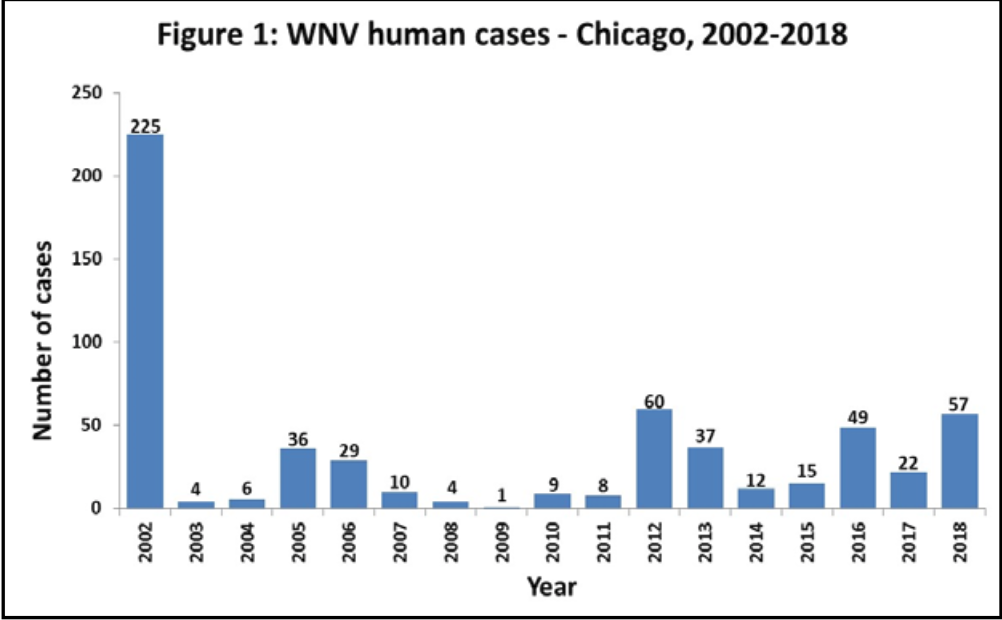
    

**WNV Human Cases and positive mosquito pools - Chicago 2018**
<br>
[Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)
<div>
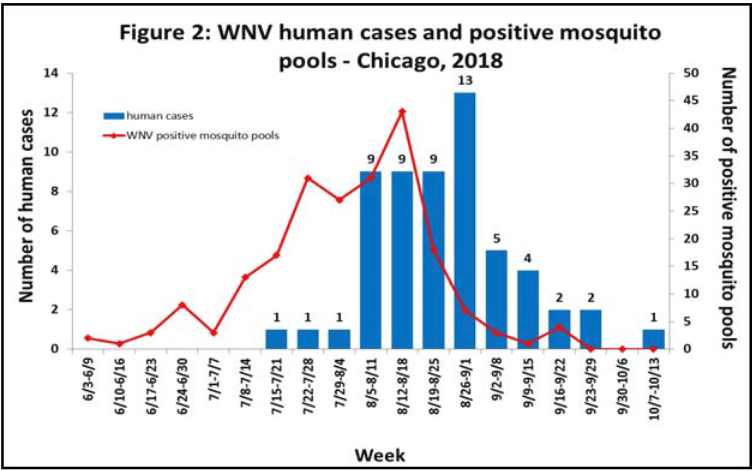
 

States across the US have typically depended on a reactionary approach to vector and WNV management to control and respond to mosquito and WNV outbreaks. However, this usually is less effective as the outbreak would have already occurred and or advanced to its late phase. Additionally, the [city budget](https://www.chicago.gov/content/dam/city/depts/obm/supp_info/2019Budget/2019BudgetOverview.pdf) is limited to USD 36 million in 2019 for Chicago Department of Public Health, where vector management comes under. Assuming 5-10% of this is allocated to vector management, Chicago's budget comes to about USD 3 million, a very limited amount that needs to be put towards a very important, yet typically expensive use. 

Instead of a reactionary approach, we propose a proactive approach to vector and WNV management that has gained traction recently across the States. Such an approach requires less expense overlay and prevents vector and WNV infections from spiraling out of control. 

One of the key tools to complement a proactive approach is predictive analytics on possible traps that will contain WNV-infected mosquitoes (i.e. the area may contain a significant population of WNV-positive mosquitoes, which may then lead to a potential WNV outbreak). Using data from 2007, 2009, 2011 and 2013, this project aims to help fulfill Chicago's ethical and fiscal responsibility in reducing WNV-infected mosquito populations by training and building a model to predict the presence of WNV in certain areas, such that targeted vector control is possible. 

The model will serve as a core tool in the proactive and predictive approach to vector management.

### 1.2. Problem Statement
[top](#Contents)

As data scientists from a data consultancy firm engaged by the Chicago Department of Public Health, our goal is to build a fully predictive model to be used for proactive mosquito management. The classification model will predict whether WNV-positive mosquitoes are found in a particular trap, and will be evaluated based on its AUC score as well as recall score.

The effects of building this model are two-folds:
1. Saving costs in terms of vector management and spraying specific traps predicted by our model which will be more effective and targeted. This helps the department to stay within their budget. 
2. The proactive and predictive approach will prevent WNV infections from reaching outbreak levels. The benefits accrued for this is the cost savings by preventing human productivity loss and medical treatment costs that might otherwise be incurred from WNV infections. 



### 1.3. Data Sources
[top](#Contents)

* The data for this project was taken from the Kaggle competition: https://www.kaggle.com/c/predict-west-nile-virus/.
* The Chicago Department of Public Health provided the following datasets in `.csv` files:
* `train.csv`: for each of the traps, contains a weekly count of the number of mosquitos found and a boolean flag for whether or not West Nile virus was found in each trap. This file contains data for 2007, 2009, 2011 and 2013.
* `test.csv`: contains trap information for 2008, 2010, 2012 and 2014, but without mosquito counts as well as wnv_rates as this is the dataset for which we need to generate predictions
* `weather.csv`: contains daily weather observations from two weather stations in Chicago
* `spray.csv`: contains GIS coordinates for locations where the city conducted spraying for mosquitoes in Chicago

## 2. Handling of the train data
[top](#Contents)

In [2]:
import pandas as pd
import numpy as np
import folium # to import folium in anaconda: conda install -c conda-forge folium
import matplotlib.pyplot as plt
import random
from folium.plugins import HeatMapWithTime
from branca.element import Figure
import branca.colormap as cm
from folium.plugins import TimeSliderChoropleth
from shapely.geometry import box, Point
import geopandas as gpd
import seaborn as sns

from datetime import datetime, timedelta
from time import mktime

In [3]:
# set maximum columns and rows to be displayed in dataframes

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

### 2.1. Load the train file 
[top](#Contents)

In [4]:
# read train dataset
# assumes that code is in starter_code folder
# while train is in a datasets folder, all under a Project_4 folder umbrella
# we want only the trap name and lat long columns
train = pd.read_csv('../datasets/train.csv')
train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

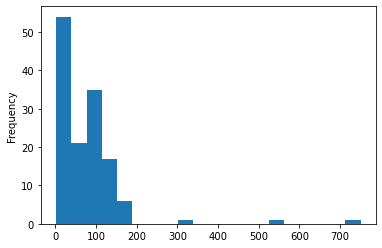

In [5]:
train['Trap'].value_counts().plot.hist(bins=20);

In [6]:
train['Trap'].value_counts().describe()

count    136.000000
mean      77.250000
std       87.409276
min        2.000000
25%       23.000000
50%       64.000000
75%      104.250000
max      750.000000
Name: Trap, dtype: float64

In [7]:
# Top 15 most sampled traps during the time period in train dataset
train['Trap'].value_counts()[:15]

T900    750
T115    542
T138    314
T002    185
T135    183
T054    163
T128    160
T151    156
T212    152
T090    151
T114    148
T158    147
T048    146
T031    146
T903    140
Name: Trap, dtype: int64

Traps are not sampled uniformly with a few traps sampled much more often compared to the rest. 50% are sampled less than 64 times during this period with the largest proportion sampled less than 50 times. 

Let's look at the locations of the traps that are sampled more often (defined as top 15 most sampled traps):

In [8]:
# will need to change column name to the new lowercase
traps_loc = train[['Trap', 'Latitude', 'Longitude']].copy()
# only want traps and lat and long, so we drop duplicates
traps_loc.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
traps_loc #check

Trap   Latitude  Longitude
0     T002  41.954690 -87.800991
1     T007  41.994991 -87.769279
2     T015  41.974089 -87.824812
3     T045  41.921600 -87.666455
4     T046  41.891118 -87.654491
..     ...        ...        ...
133   T236  41.994679 -87.770899
134   T237  41.738903 -87.695443
135   T238  41.753391 -87.707394
136  T094B  41.719140 -87.669539
137  T054C  41.925652 -87.633590

[138 rows x 3 columns]

### 2.2. Analyze the trap locations 
[top](#Contents)

For each trap, we are given the latitiude and longitude of the trap location. We will do a geographical plot to analyze the exact location of each trap.

In [10]:
fig = Figure(width=800, height=600)
m = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=10,
               max_zoom=14,
               tiles='Stamen Terrain')  # show terrain as parks/woods and water bodies

fig.add_child(m)

for name, lat, long, in traps_loc.values:
    folium.CircleMarker(location=[lat, long],
                        popup=name,
                        radius=2,
                        color='blue',
                        fillOpacity=1
                       ).add_to(m)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Trap locations in Chicago City')   

fig.get_root().html.add_child(folium.Element(title_html))


m

We will use a different color for the top-sampled traps in Chicago, and analyze places that have a higher number of mosquitos.

In [11]:
fig2 = Figure(width=800, height=600)
m2 = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=10,
               max_zoom=14,
               tiles='Stamen Terrain')  # show terrain as parks/woods and water bodies

fig2.add_child(m2)

# define list of top 15 sampled traps:
top_traps = train['Trap'].value_counts().index[:15].tolist()

for name, lat, long, in traps_loc.values:
    if name in top_traps:
        folium.CircleMarker(location=[lat, long],
                        popup=name,
                        radius=2,
                        color='orange',
                        fillOpacity=1
                       ).add_to(m2)
    else:
        folium.CircleMarker(location=[lat, long],
                        popup=name,
                        radius=2,
                        color='blue',
                        fillOpacity=1
                       ).add_to(m2)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Trap locations in Chicago City with top-sampled traps in orange')   

fig2.get_root().html.add_child(folium.Element(title_html))


m2

#### Interpretation:

Visually, we notice that some of the traps located near the parks have a higher probability of being a top sampled traps. It is possible that the parks provide a better breeding environment for the mosquitos.

## 3. Analyze how the mosquitos number and wnv counts change with time
[top](#Contents)

We would like to examine how the mosquitoes numbers change over time in our dataset and potentially see if we can spot any trends. Likewise, we would like to visually see how the wnv counts changes and if there were any hotspots clusters from the visuals that we will plot. 

In [12]:
# new df for our workings, mos_df and new column 'date_mth'
mos_df = train.copy()
mos_df['date_mth'] = mos_df['Date']

# create new column 'date_mth'
# which will aggregate our data for the month as days will be too granular for our map analysis
# input 01 at the end so that it still works as a valid date column
# ie 2007-05-01 will be aggregated data for the month of May in 2007

for i in range(len(mos_df['Date'])):
    mos_df['date_mth'][i] = mos_df['Date'][i][:8] + '01'

<ipython-input-12-6abc72a2816b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos_df['date_mth'][i] = mos_df['Date'][i][:8] + '01'


In [13]:
mos_count = mos_df.groupby(['Trap','date_mth'], as_index = False)[['NumMosquitos']].sum()
mos_count

Trap    date_mth  NumMosquitos
0     T001  2007-06-01             1
1     T001  2007-07-01             2
2     T001  2007-08-01            19
3     T001  2007-09-01             1
4     T001  2007-10-01             2
...    ...         ...           ...
1448  T903  2011-09-01           237
1449  T903  2013-06-01            60
1450  T903  2013-07-01            44
1451  T903  2013-08-01            60
1452  T903  2013-09-01            30

[1453 rows x 3 columns]

In [14]:
# converging on the lat and long coordinates
areas = mos_df.groupby(['Trap', 'date_mth'], as_index = False)[['Latitude','Longitude']].median()
areas

Trap    date_mth   Latitude  Longitude
0     T001  2007-06-01  41.953705 -87.733974
1     T001  2007-07-01  41.953705 -87.733974
2     T001  2007-08-01  41.953705 -87.733974
3     T001  2007-09-01  41.953705 -87.733974
4     T001  2007-10-01  41.953705 -87.733974
...    ...         ...        ...        ...
1448  T903  2011-09-01  41.957799 -87.930995
1449  T903  2013-06-01  41.957799 -87.930995
1450  T903  2013-07-01  41.957799 -87.930995
1451  T903  2013-08-01  41.957799 -87.930995
1452  T903  2013-09-01  41.957799 -87.930995

[1453 rows x 4 columns]

In [15]:
wnv = mos_df.groupby(['Trap', 'date_mth'], as_index = False)[['WnvPresent']].sum() 

# let's make WnvPresent as the original binary 1 and 0
wnv['WnvPresent'] = wnv['WnvPresent'].map(lambda x: 1 if x > 0 else 0)
wnv

Trap    date_mth  WnvPresent
0     T001  2007-06-01           0
1     T001  2007-07-01           0
2     T001  2007-08-01           0
3     T001  2007-09-01           0
4     T001  2007-10-01           0
...    ...         ...         ...
1448  T903  2011-09-01           1
1449  T903  2013-06-01           0
1450  T903  2013-07-01           0
1451  T903  2013-08-01           0
1452  T903  2013-09-01           0

[1453 rows x 3 columns]

In [16]:
mos_areas_wnv = pd.concat([mos_count, areas, wnv], axis=1)

# removing duplicated columns
mos_areas_wnv = mos_areas_wnv.loc[:,~mos_areas_wnv.columns.duplicated()]
mos_areas_wnv

Trap    date_mth  NumMosquitos   Latitude  Longitude  WnvPresent
0     T001  2007-06-01             1  41.953705 -87.733974           0
1     T001  2007-07-01             2  41.953705 -87.733974           0
2     T001  2007-08-01            19  41.953705 -87.733974           0
3     T001  2007-09-01             1  41.953705 -87.733974           0
4     T001  2007-10-01             2  41.953705 -87.733974           0
...    ...         ...           ...        ...        ...         ...
1448  T903  2011-09-01           237  41.957799 -87.930995           1
1449  T903  2013-06-01            60  41.957799 -87.930995           0
1450  T903  2013-07-01            44  41.957799 -87.930995           0
1451  T903  2013-08-01            60  41.957799 -87.930995           0
1452  T903  2013-09-01            30  41.957799 -87.930995           0

[1453 rows x 6 columns]

In [17]:
# most mosquitoes (75th percentile) caught in a month are less than 70
mos_areas_wnv['NumMosquitos'].describe()

count     1453.000000
mean        92.938059
std        422.551717
min          1.000000
25%          7.000000
50%         21.000000
75%         67.000000
max      10991.000000
Name: NumMosquitos, dtype: float64

<AxesSubplot:ylabel='Frequency'>

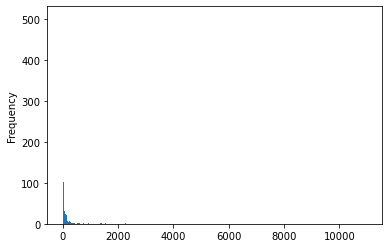

In [18]:
# Visually, the number of Mosquitos caught for the month are highly imbalanced with some extreme values
mos_areas_wnv['NumMosquitos'].plot.hist(bins=1000)

In [19]:
# define list of traps where more than 1000 mosquitoes were caught in any particular month
# we shall mark out these traps in our map
mos_list = mos_areas_wnv.loc[mos_areas_wnv['NumMosquitos'] > 500]['Trap'].unique().tolist()
print(len(mos_list))
mos_list

20


['T002',
 'T008',
 'T030',
 'T086',
 'T103',
 'T114',
 'T115',
 'T128',
 'T135',
 'T138',
 'T158',
 'T200',
 'T212',
 'T215',
 'T221',
 'T223',
 'T225',
 'T227',
 'T900',
 'T903']

In [20]:
# out of the 20 traps that had more than 500 mosquitoes caught in another particular month
# we find out how many were in the top sampled traps
for trap in mos_list:
    if trap in top_traps:
        print(trap)

T002
T114
T115
T128
T135
T138
T158
T212
T900
T903


In [21]:
fig3 = Figure(width=800, height=600)
m3 = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=10,
               max_zoom=14,
               tiles='Stamen Terrain')  # show terrain as parks/woods and water bodies

fig3.add_child(m3)

for name, lat, long, in traps_loc.values:
    if name in mos_list:
        folium.CircleMarker(location=[lat, long],
                        popup=name,
                        radius=2,
                        color='orange',
                        fillOpacity=1
                       ).add_to(m3)
        
    else:
        folium.CircleMarker(location=[lat, long],
                        popup=name,
                        radius=2,
                        color='blue',
                        fillOpacity=1
                       ).add_to(m3)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Trap with more than 500 Mosquitoes caught in orange') 
fig3.get_root().html.add_child(folium.Element(title_html))

m3.save('../maps/top_mosquitoes_traps.html')

m3

Traps with more than 500 mosquitoes caught mirror closely the traps that are sampled frequently where 10 of these were in the top 15 sampled traps. 

Past Mosquitoes hotspots (defined as traps that have previously capture more than 500 mosquitoes in a month) are mostly located in the northwest and southeast of the city. The northwest cluster is mainly located near the airport surrounded with woods/parks and water bodies. <br>

Similarly, the southeast cluster is surrounded by Lake Calumet and Wolf lake, with most of the traps there identified as hotspots. Let's see the trend in number of mosquitoes caught across our time period in our dataset. 

We'll also prepare our dataset to what we need for our Folium maps to show how the mosquitoes numbers change over the time period: 

In [22]:
# since NumMosquitos is highly imbalanced with large outliers, we log the dataset:
# create a color heatmap based on the log(NumMosquitos)
mos_areas_wnv['log_mos'] = np.log10(mos_areas_wnv['NumMosquitos'])
max_colour = max(mos_areas_wnv['log_mos'])
min_colour = min(mos_areas_wnv['log_mos'])
cmap = cm.linear.YlOrRd_09.scale(min_colour, max_colour)
mos_areas_wnv['color'] = mos_areas_wnv['log_mos'].map(cmap)

In [23]:
# define new df that we will work with in colors 
mos_num_color = mos_areas_wnv[['date_mth', 'Trap', 'color']].copy()
mos_num_color

date_mth  Trap      color
0     2007-06-01  T001  #ffffccff
1     2007-07-01  T001  #fff5b2ff
2     2007-08-01  T001  #fec560ff
3     2007-09-01  T001  #ffffccff
4     2007-10-01  T001  #fff5b2ff
...          ...   ...        ...
1448  2011-09-01  T903  #fd612fff
1449  2013-06-01  T903  #fe9f43ff
1450  2013-07-01  T903  #fea948ff
1451  2013-08-01  T903  #fe9f43ff
1452  2013-09-01  T903  #feb54fff

[1453 rows x 3 columns]

In [24]:
mos_num_color['Trap'].unique().tolist()

['T001',
 'T002',
 'T003',
 'T004',
 'T005',
 'T006',
 'T007',
 'T008',
 'T009',
 'T011',
 'T012',
 'T013',
 'T014',
 'T015',
 'T016',
 'T017',
 'T018',
 'T019',
 'T025',
 'T027',
 'T028',
 'T030',
 'T031',
 'T033',
 'T034',
 'T035',
 'T036',
 'T037',
 'T039',
 'T040',
 'T043',
 'T044',
 'T045',
 'T046',
 'T047',
 'T048',
 'T049',
 'T050',
 'T051',
 'T054',
 'T054C',
 'T060',
 'T061',
 'T062',
 'T063',
 'T065',
 'T066',
 'T067',
 'T069',
 'T070',
 'T071',
 'T072',
 'T073',
 'T074',
 'T075',
 'T076',
 'T077',
 'T078',
 'T079',
 'T080',
 'T081',
 'T082',
 'T083',
 'T084',
 'T085',
 'T086',
 'T088',
 'T089',
 'T090',
 'T091',
 'T092',
 'T094',
 'T094B',
 'T095',
 'T096',
 'T097',
 'T099',
 'T100',
 'T102',
 'T103',
 'T107',
 'T114',
 'T115',
 'T128',
 'T129',
 'T135',
 'T138',
 'T141',
 'T142',
 'T143',
 'T144',
 'T145',
 'T146',
 'T147',
 'T148',
 'T149',
 'T150',
 'T151',
 'T152',
 'T153',
 'T154',
 'T155',
 'T156',
 'T157',
 'T158',
 'T159',
 'T160',
 'T161',
 'T162',
 'T200',
 'T206',

In [25]:
# since not all traps are sampled every month, 
# traps that are not sampled for the month should be in a different color (green)
for date in mos_num_color['date_mth'].unique():
    # set of all traps, minus set of traps that were sampled on that date
    diff=set(mos_num_color['Trap'].unique().tolist())-set(mos_num_color[mos_num_color['date_mth']==date]['Trap'])
    for trap in diff:
        mos_num_color=pd.concat([mos_num_color, pd.DataFrame([[date,trap,'#00cc00']],columns=['date_mth','Trap','color'])],ignore_index=True)
mos_num_color.sort_values('date_mth',inplace=True)

In [26]:
mos_num_color

date_mth  Trap    color
1734  2007-05-01  T082  #00cc00
1673  2007-05-01  T220  #00cc00
1672  2007-05-01  T107  #00cc00
1671  2007-05-01  T072  #00cc00
1670  2007-05-01  T013  #00cc00
...          ...   ...      ...
2608  2013-09-01  T078  #00cc00
2609  2013-09-01  T037  #00cc00
2610  2013-09-01  T200  #00cc00
2603  2013-09-01  T156  #00cc00
2558  2013-09-01  T096  #00cc00

[2720 rows x 3 columns]

In [27]:
# convert date_mth to unix time in nanoseconds:
mos_num_color['date_mth'] = (pd.DatetimeIndex(mos_num_color['date_mth']).astype(int) // 10**9).astype('U10')



In [28]:
# we want to represent the change in mosquitoes numbers over time. Folium allows us to do this with some prep:
# style dict, dict in dict
# lvl 1 keys = Trap
# lvl 2 keys = time
# lvl 2 values = color (based on NumMosquitos) and opacity

In [29]:
mos_num_color

date_mth  Trap    color
1734  1177977600  T082  #00cc00
1673  1177977600  T220  #00cc00
1672  1177977600  T107  #00cc00
1671  1177977600  T072  #00cc00
1670  1177977600  T013  #00cc00
...          ...   ...      ...
2608  1377993600  T078  #00cc00
2609  1377993600  T037  #00cc00
2610  1377993600  T200  #00cc00
2603  1377993600  T156  #00cc00
2558  1377993600  T096  #00cc00

[2720 rows x 3 columns]

In [30]:
# create style dict
trap_list = mos_num_color['Trap'].unique().tolist()
trap_idx = range(len(trap_list))

style_dict={}
for i in trap_idx:
    trap = trap_list[i]
    result = mos_num_color[mos_num_color['Trap'] == trap]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['date_mth']] = {'color': r['color'], 'opacity': 0.7}
    style_dict[str(trap_list[i])] = inner_dict

In [31]:
# going back to our mos_areas_wnv df
# create new geometry column that will be used to plot our time series visuals for our traps:
mos_areas_wnv['geometry'] = ''

for record in mos_areas_wnv.index:
    mos_areas_wnv.geometry.at[record] = box(mos_areas_wnv.loc[record].Longitude-0.0035,
                                            mos_areas_wnv.loc[record].Latitude-0.0035, 
                                            mos_areas_wnv.loc[record].Longitude+0.0035,
                                            mos_areas_wnv.loc[record].Latitude+0.0035, 
                                            )
  
    

In [32]:
style_dict # check

{'T082': {'1177977600': {'color': '#00cc00', 'opacity': 0.7},
  '1180656000': {'color': '#00cc00', 'opacity': 0.7},
  '1183248000': {'color': '#ffdc7bff', 'opacity': 0.7},
  '1185926400': {'color': '#f84427ff', 'opacity': 0.7},
  '1188604800': {'color': '#ffea98ff', 'opacity': 0.7},
  '1191196800': {'color': '#fed773ff', 'opacity': 0.7},
  '1241136000': {'color': '#fff5b2ff', 'opacity': 0.7},
  '1243814400': {'color': '#fecf6bff', 'opacity': 0.7},
  '1246406400': {'color': '#fec15cff', 'opacity': 0.7},
  '1249084800': {'color': '#ffe690ff', 'opacity': 0.7},
  '1251763200': {'color': '#fed773ff', 'opacity': 0.7},
  '1254355200': {'color': '#ffea98ff', 'opacity': 0.7},
  '1306886400': {'color': '#fecf6bff', 'opacity': 0.7},
  '1309478400': {'color': '#feb44eff', 'opacity': 0.7},
  '1312156800': {'color': '#ffde7fff', 'opacity': 0.7},
  '1314835200': {'color': '#fe9e43ff', 'opacity': 0.7},
  '1370044800': {'color': '#febe59ff', 'opacity': 0.7},
  '1372636800': {'color': '#fd7b37ff', 'opac

In [33]:
# prep the map data to be referred to
traps_loc_geo = mos_areas_wnv[['Trap', 'geometry']].copy()
traps_loc_geo.drop_duplicates(subset='Trap', inplace=True, ignore_index=True)
traps_loc_geo

Trap                                           geometry
0    T001  POLYGON ((-87.730474 41.950205, -87.730474 41....
1    T002  POLYGON ((-87.79749099999999 41.95119, -87.797...
2    T003  POLYGON ((-87.754139 41.960742, -87.754139 41....
3    T004  POLYGON ((-87.744867 41.959228, -87.744867 41....
4    T005  POLYGON ((-87.772885 41.93861399999999, -87.77...
..    ...                                                ...
131  T236  POLYGON ((-87.767399 41.991179, -87.767399 41....
132  T237  POLYGON ((-87.69194299999999 41.735403, -87.69...
133  T238  POLYGON ((-87.70389399999999 41.749891, -87.70...
134  T900  POLYGON ((-87.88711499999999 41.971189, -87.88...
135  T903  POLYGON ((-87.92749499999999 41.954299, -87.92...

[136 rows x 2 columns]

In [34]:
# transform to a GeoDataFrame type
traps_gdf = gpd.GeoDataFrame(traps_loc_geo)

In [35]:
fig4= Figure(width=800, height=600)
m4= folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=2,
               max_zoom=14,
               tiles='Stamen Terrain')
fig4.add_child(m4)
g = TimeSliderChoropleth(data=traps_gdf.set_index('Trap').to_json(),
                         styledict = style_dict).add_to(m4)

_ = cmap.add_to(m4)
cmap.caption = 'Number of Mosquitoes in log form'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Number of mosquitoes caught')   

fig4.get_root().html.add_child(folium.Element(title_html))

m4.save('../maps/mosquito_by_month.html')

m4

#### Interpretation:

1. In terms of number of mosquitoes caught in traps per month, August and September were considered to be the peak months, this is perhaps due to the conducive weather which promotes mosquito breeding. <br>

2. Our northwest and southeast cluster consistently has high number of mosquitoes caught monthly, even when it wasn't the peak months (August / September)

3. 2007 seems to be a particularly bad year in terms of the number of mosquitoes caught, especially in Aug 2007, where most of the traps are orange to deep red. 2009 and 2011 seems to be milder in comparison while 2013 was simliar to 2007.



## 4. Checking area for WNV rates
[top](#Contents)

In [36]:
# prep color bar for WnvPresent column, blue if no wnv present, red otherwise

mos_areas_wnv['color_wnv'] = mos_areas_wnv['WnvPresent'].map(lambda x: '#ff3300' if x ==1 else '#0033cc')

In [37]:
# define new df for wnv that we will work with in colors 
mos_wnv = mos_areas_wnv[['date_mth', 'Trap', 'color_wnv']].copy()

In [38]:
mos_wnv

date_mth  Trap color_wnv
0     2007-06-01  T001   #0033cc
1     2007-07-01  T001   #0033cc
2     2007-08-01  T001   #0033cc
3     2007-09-01  T001   #0033cc
4     2007-10-01  T001   #0033cc
...          ...   ...       ...
1448  2011-09-01  T903   #ff3300
1449  2013-06-01  T903   #0033cc
1450  2013-07-01  T903   #0033cc
1451  2013-08-01  T903   #0033cc
1452  2013-09-01  T903   #0033cc

[1453 rows x 3 columns]

In [39]:
mos_wnv['date_mth'] = (pd.DatetimeIndex(mos_wnv['date_mth']).astype(int) // 10**9).astype('U10')

In [40]:
# similarly, since not all traps are sampled every month, 
# traps that are not sampled for the month should be in a different color (green)
for date in mos_wnv['date_mth'].unique():
    # set of all traps, minus set of traps that were sampled on that date
    diff=set(mos_wnv['Trap'].unique().tolist())-set(mos_wnv[mos_wnv['date_mth']==date]['Trap'])
    for trap in diff:
        mos_wnv=pd.concat([mos_wnv, pd.DataFrame([[date,trap,'#00cc00']],columns=['date_mth','Trap','color_wnv'])],ignore_index=True)
mos_wnv.sort_values('date_mth',inplace=True)

In [41]:
mos_wnv

date_mth  Trap color_wnv
1734  1177977600  T082   #00cc00
1673  1177977600  T220   #00cc00
1672  1177977600  T107   #00cc00
1671  1177977600  T072   #00cc00
1670  1177977600  T013   #00cc00
...          ...   ...       ...
2608  1377993600  T078   #00cc00
2609  1377993600  T037   #00cc00
2610  1377993600  T200   #00cc00
2603  1377993600  T156   #00cc00
2558  1377993600  T096   #00cc00

[2720 rows x 3 columns]

In [42]:
trap_list = mos_areas_wnv['Trap'].unique().tolist()
trap_idx = range(len(trap_list))

style_dict_wnv={}
for i in trap_idx:
    trap = trap_list[i]
    result = mos_wnv[mos_wnv['Trap'] == trap]
    inner_dict_wnv = {}
    for _, r in result.iterrows():
        inner_dict_wnv[r['date_mth']] = {'color': r['color_wnv'], 'opacity': 0.7}
    style_dict_wnv[str(trap_list[i])] = inner_dict_wnv

In [43]:
fig5 = Figure(width=800, height=700)
m5 = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=2,
               max_zoom=14,
               tiles='Stamen Terrain')
fig5.add_child(m5)
g = TimeSliderChoropleth(data=traps_gdf.set_index('Trap').to_json(),
                         styledict = style_dict_wnv).add_to(m5)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Traps with observed wnv virus (red)')   

fig5.get_root().html.add_child(folium.Element(title_html))

m5.save('../maps/wnv_traps.html')
m5

#### Interpretations:

1. Aug 2007 was the worst in terms of wnv rates as a high number of traps had mosquitoes with wnv in them. Likewise, Aug 2013 and Sep 2013 were pretty bad too. This seem to coincide with the peak periods for number of mosquitoes caught. 

2. The northwest area seem to have higher occurences of wnv compared to the southeast area. Also, the peak months seems to be in Aug and Sep every year. 

3. For non peak months, especially before Aug, the positive traps are mostly inland perhaps because the inland temperature is higher. 

4. Sampling/testing were done much lesser during the non-peak months. While that might not be a problem if no wnv were found, but there were months where wnv were found but a high number of traps surrounding those positive traps were not sampled, for example in Jul 2009 and Jul 2011, as well as Jun - Jul 2013.



## 5. Relationship between birds santuary and WNV
[top](#Contents)

Reading more on the West Nile Virus, it seems birds are the main hosts of the virus and mosquitoes become the vectors when they suck the blood of host birds. Humans then become infected when these mosquitoes subsequently suck the blook of humans. <br>

Additionally, according to this article on [Birds in Chicago](https://storymaps.arcgis.com/stories/4b167081562a409bac6851e392d51cd3) as well as [Migratory Birds in US](https://www.nationalgeographic.com/magazine/2018/03/bird-migration-interactive-maps/), Chicago lies on the main path of migratory birds and is host to a large number of birds in the city during the summer months. Chicago also has a number of birds santuary where flocks of birds would gather. Let's explore these locations to see if any trends can be gleaned:

In [44]:
# inserting locations of bird santuaries into our map
# taken from https://storymaps.arcgis.com/stories/4b167081562a409bac6851e392d51cd3 
# and searching in google maps
montrose = [41.963266261709194, -87.63320342519752]
bill_jarvis = [41.9491708888463, -87.64054543099897]
lincoln_park = [41.92148600224963, -87.63242806614468]
humboldt_park = [41.9050876685724, -87.70190200598076]
mccormick = [41.84995877333251, -87.60916438398793]

In [45]:
fig6 = Figure(width=800, height=700)
m6 = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=2,
               max_zoom=14,
               tiles='Stamen Terrain')

fig6.add_child(m6)
g = TimeSliderChoropleth(data=traps_gdf.set_index('Trap').to_json(),
                         styledict = style_dict_wnv).add_to(m6)

folium.CircleMarker(location=montrose, popup='Montrose Point Santuary', radius=3, color='pink', fillOpacity=0.5).add_to(m6)
folium.CircleMarker(location=bill_jarvis, popup='Bill Jarvis Santuary', radius=3, color='pink', fillOpacity=0.5).add_to(m6)
folium.CircleMarker(location=lincoln_park, popup='Lincoln Park', radius=3, color='pink', fillOpacity=0.5).add_to(m6)
folium.CircleMarker(location=humboldt_park, popup='Humboldt Bird Park', radius=3, color='pink', fillOpacity=0.5).add_to(m6)
folium.CircleMarker(location=mccormick, popup='McCormick Place Santuary', radius=3, color='pink', fillOpacity=0.5).add_to(m6)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Traps with observed wnv virus and locations of bird santuaries')   

fig6.get_root().html.add_child(folium.Element(title_html))
m6

#### Interpretations:

Visually, there is no significant relationship between the location of bird santuaries and locations of mosquito traps with WNV observed.

There are 5 bird santuaries in Chicago, mostly located near the coastal area. However, mosquito traps with WNV observed are found spread around the city, and are not clustered at any of the bird sanctuaries.

## 6. Effect of spraying and WNV
[top](#Contents)

Let's look at the spraying dataset and see if spraying helps to reduce mosquito numbers / wnv rates:

In [46]:
# load spray dataset
spray = pd.read_csv('../datasets/spray.csv')

In [47]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [48]:
# we don't need the time as it is too granular, so we drop it
spray_heatmap = spray.drop(columns='Time')

In [49]:
# checking for null values
spray_heatmap.isnull().sum()

Date         0
Latitude     0
Longitude    0
dtype: int64

In [50]:
spray_heatmap

Date   Latitude  Longitude
0      2011-08-29  42.391623 -88.089163
1      2011-08-29  42.391348 -88.089163
2      2011-08-29  42.391022 -88.089157
3      2011-08-29  42.390637 -88.089158
4      2011-08-29  42.390410 -88.088858
...           ...        ...        ...
14830  2013-09-05  42.006587 -87.812355
14831  2013-09-05  42.006192 -87.816015
14832  2013-09-05  42.006022 -87.817392
14833  2013-09-05  42.005453 -87.817423
14834  2013-09-05  42.004805 -87.817460

[14835 rows x 3 columns]

In [51]:
# drop duplicates
spray_heatmap.drop_duplicates(inplace=True)

In [52]:
spray_heatmap

Date   Latitude  Longitude
0      2011-08-29  42.391623 -88.089163
1      2011-08-29  42.391348 -88.089163
2      2011-08-29  42.391022 -88.089157
3      2011-08-29  42.390637 -88.089158
4      2011-08-29  42.390410 -88.088858
...           ...        ...        ...
14830  2013-09-05  42.006587 -87.812355
14831  2013-09-05  42.006192 -87.816015
14832  2013-09-05  42.006022 -87.817392
14833  2013-09-05  42.005453 -87.817423
14834  2013-09-05  42.004805 -87.817460

[14294 rows x 3 columns]

In [53]:
# create list of dates
dates = spray_heatmap['Date'].unique().tolist()

In [54]:
# Create latitude and longitude list to pass into map
lat_long_list = []
for date in dates:
    temp = []
    for i, row in spray_heatmap[spray_heatmap['Date'] == date].iterrows():
        temp.append([row['Latitude'], row['Longitude']])
    lat_long_list.append(temp)

In [55]:
lat_long_list[0] #check

[[42.3916233333333, -88.0891633333333],
 [42.3913483333333, -88.0891633333333],
 [42.3910216666667, -88.0891566666667],
 [42.3906366666667, -88.0891583333333],
 [42.39041, -88.0888583333333],
 [42.390395, -88.088315],
 [42.3906733333333, -88.0880016666667],
 [42.3910266666667, -88.0880016666667],
 [42.3914033333333, -88.0880033333333],
 [42.3917183333333, -88.087995],
 [42.3920383333333, -88.0879883333333],
 [42.39241, -88.0880783333333],
 [42.3928, -88.0883316666667],
 [42.3932566666667, -88.08837],
 [42.3936, -88.0882316666667],
 [42.3932033333333, -88.0884166666667],
 [42.3927916666667, -88.0883116666667],
 [42.3924766666667, -88.08821],
 [42.392385, -88.0886966666667],
 [42.3920983333333, -88.0891133333333],
 [42.39218, -88.0894983333333],
 [42.3924283333333, -88.08979],
 [42.3927216666667, -88.0900416666667],
 [42.3929583333333, -88.0903],
 [42.39299, -88.090895],
 [42.3930016666667, -88.0916116666667],
 [42.3930083333333, -88.09201],
 [42.39302, -88.0925483333333],
 [42.393103333

In [56]:
traps_loc

Trap   Latitude  Longitude
0     T002  41.954690 -87.800991
1     T007  41.994991 -87.769279
2     T015  41.974089 -87.824812
3     T045  41.921600 -87.666455
4     T046  41.891118 -87.654491
..     ...        ...        ...
133   T236  41.994679 -87.770899
134   T237  41.738903 -87.695443
135   T238  41.753391 -87.707394
136  T094B  41.719140 -87.669539
137  T054C  41.925652 -87.633590

[138 rows x 3 columns]

In [57]:
# define new map
fig7 = Figure(width=800, height=600)
m7 = folium.Map(location=[41.85, -87.65], 
               zoom_start=9.5, 
               min_zoom=8,
               max_zoom=14,
               tiles='Stamen Terrain')  # show terrain as parks/woods and water bodies

fig7.add_child(m7)

for name, lat, long, in traps_loc.values:
    folium.CircleMarker(location=[lat, long],
                        popup=name,
                        radius=2,
                        color='blue',
                        fillOpacity=1).add_to(m7)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Spraying locations in Chicago City')   

fig7.get_root().html.add_child(folium.Element(title_html))


HeatMapWithTime(data = lat_long_list,
                index = dates,
                radius=15,
                auto_play=False,
                position='bottomright').add_to(m7)

m7.save('../maps/spraying.html')
m7

**Does Spraying Help to Reduce Mosquito Numbers?**

Does spraying help to reduce the mosquito numbers and prevent West Nile Virus? In our spraying dataset, spraying was done on 10 distinct days of which the first day (29 Aug 2011) was done at a location so far away from the city that we do not have traps data to analyze the effect. <br>

Ignoring this, we will analyze the effect of the other 9 days on the traps data. Also, we will look at data 10 days before and 15 days after the spraying dates to analyze trends on the mosquito numbers and subsequently WNV rates to determine spraying's efficacy as a form of vector management.

In [58]:
spray_heatmap.dtypes

Date          object
Latitude     float64
Longitude    float64
dtype: object

In [59]:
# change the date to datetime jobject
spray_heatmap['Date'] = pd.to_datetime(spray_heatmap['Date']).dt.date

In [60]:
spray_heatmap

Date   Latitude  Longitude
0      2011-08-29  42.391623 -88.089163
1      2011-08-29  42.391348 -88.089163
2      2011-08-29  42.391022 -88.089157
3      2011-08-29  42.390637 -88.089158
4      2011-08-29  42.390410 -88.088858
...           ...        ...        ...
14830  2013-09-05  42.006587 -87.812355
14831  2013-09-05  42.006192 -87.816015
14832  2013-09-05  42.006022 -87.817392
14833  2013-09-05  42.005453 -87.817423
14834  2013-09-05  42.004805 -87.817460

[14294 rows x 3 columns]

In [61]:
spray_dates = spray_heatmap['Date'].unique().tolist()
spray_dates

[datetime.date(2011, 8, 29),
 datetime.date(2011, 9, 7),
 datetime.date(2013, 7, 17),
 datetime.date(2013, 7, 25),
 datetime.date(2013, 8, 8),
 datetime.date(2013, 8, 15),
 datetime.date(2013, 8, 16),
 datetime.date(2013, 8, 22),
 datetime.date(2013, 8, 29),
 datetime.date(2013, 9, 5)]

In [62]:
# since some our spraying dates are close to each other, 
# we specify the boundary (min, max) dates where we will analyze the data
# also, note that since spraying on 29 Aug 2011 is so far away from our traps, we
# are probably unable to analyze any effects on it
min_date_1 = spray_dates[1] - timedelta(days = 10)
max_date_1 = spray_dates[1] + timedelta(days = 15)
min_date_2 = spray_dates[2] - timedelta(days = 10)
max_date_2 = spray_dates[9] + timedelta(days = 15) # since spray in 2013 was so close together

# we are left with 2 range of dates to analyze the effects of spraying

In [63]:
# join this with train dataset to get the mosquito and wnv info for these particular dates
# create new df with only necessary features
daily_df = train[['Date', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent']].copy()
daily_df.head()

Date  Trap   Latitude  Longitude  NumMosquitos  WnvPresent
0  2007-05-29  T002  41.954690 -87.800991             1           0
1  2007-05-29  T002  41.954690 -87.800991             1           0
2  2007-05-29  T007  41.994991 -87.769279             1           0
3  2007-05-29  T015  41.974089 -87.824812             1           0
4  2007-05-29  T015  41.974089 -87.824812             4           0

In [64]:
# change the date to datetime jobject
daily_df['Date'] = pd.to_datetime(daily_df['Date']).dt.date
daily_df.head()

Date  Trap   Latitude  Longitude  NumMosquitos  WnvPresent
0  2007-05-29  T002  41.954690 -87.800991             1           0
1  2007-05-29  T002  41.954690 -87.800991             1           0
2  2007-05-29  T007  41.994991 -87.769279             1           0
3  2007-05-29  T015  41.974089 -87.824812             1           0
4  2007-05-29  T015  41.974089 -87.824812             4           0

In [65]:
daily_mos_count = daily_df.groupby(['Date','Trap'], as_index = False)[['NumMosquitos']].sum()
daily_wnv = daily_df.groupby(['Date', 'Trap'], as_index = False)[['WnvPresent']].sum()

# let's make WnvPresent as the original binary 1 and 0
daily_wnv['WnvPresent'] = daily_wnv['WnvPresent'].map(lambda x: 1 if x > 0 else 0)

# concat the 2 and remove duplicated columns
daily_mos = pd.concat([daily_mos_count, daily_wnv], axis=1)
daily_mos = daily_mos.loc[:,~daily_mos.columns.duplicated()]
daily_mos

Date  Trap  NumMosquitos  WnvPresent
0     2007-05-29  T002             2           0
1     2007-05-29  T007             1           0
2     2007-05-29  T015             5           0
3     2007-05-29  T045             2           0
4     2007-05-29  T046             1           0
...          ...   ...           ...         ...
4611  2013-09-26  T231             5           0
4612  2013-09-26  T232             1           0
4613  2013-09-26  T233             5           0
4614  2013-09-26  T235             1           0
4615  2013-09-26  T900            80           1

[4616 rows x 4 columns]

In [66]:
# change the date to datetime jobject
daily_mos['Date'] = pd.to_datetime(daily_mos['Date']).dt.date

In [67]:
test = daily_mos[((daily_mos['Date'] >= min_date_1) & (daily_mos['Date'] <= max_date_1))]
test['Date'].unique()

array([datetime.date(2011, 9, 1), datetime.date(2011, 9, 2),
       datetime.date(2011, 9, 12), datetime.date(2011, 9, 16)],
      dtype=object)

In [68]:
# filter our daily_mos dataframe according to our date ranges
daily_mos = daily_mos[((daily_mos['Date'] >= min_date_1) & (daily_mos['Date'] <= max_date_1)) |
                      ((daily_mos['Date'] >= min_date_2) & (daily_mos['Date'] <= max_date_2))]

daily_mos

Date  Trap  NumMosquitos  WnvPresent
3173  2011-09-01  T002            22           0
3174  2011-09-01  T003            46           1
3175  2011-09-01  T008            10           0
3176  2011-09-01  T011             4           0
3177  2011-09-01  T012             4           0
...          ...   ...           ...         ...
4548  2013-09-19  T232             4           0
4549  2013-09-19  T233            21           0
4550  2013-09-19  T235            15           0
4551  2013-09-19  T236             2           0
4552  2013-09-19  T900           123           1

[1034 rows x 4 columns]

In [69]:
daily_mos['Date'].unique()

array([datetime.date(2011, 9, 1), datetime.date(2011, 9, 2),
       datetime.date(2011, 9, 12), datetime.date(2011, 9, 16),
       datetime.date(2013, 7, 8), datetime.date(2013, 7, 12),
       datetime.date(2013, 7, 19), datetime.date(2013, 7, 25),
       datetime.date(2013, 8, 1), datetime.date(2013, 8, 8),
       datetime.date(2013, 8, 15), datetime.date(2013, 8, 22),
       datetime.date(2013, 8, 29), datetime.date(2013, 9, 6),
       datetime.date(2013, 9, 12), datetime.date(2013, 9, 19)],
      dtype=object)

In [70]:
daily_mos.describe()
# even on a daily basis, NumMosquitos again have huge outliers

NumMosquitos   WnvPresent
count   1034.000000  1034.000000
mean      32.546422     0.173114
std       64.385999     0.378529
min        1.000000     0.000000
25%        5.000000     0.000000
50%       13.000000     0.000000
75%       34.000000     0.000000
max      984.000000     1.000000

In [71]:
# again since NumMosquitos is highly imbalanced with large outliers, we log the dataset:
# and assign a color heatmap based on this
daily_mos['log_mos'] = np.log10(daily_mos['NumMosquitos'])
max_colour = max(daily_mos['log_mos'])
min_colour = min(daily_mos['log_mos'])
cmap_num_mos = cm.linear.YlOrRd_09.scale(min_colour, max_colour)
daily_mos['color'] = daily_mos['log_mos'].map(cmap_num_mos)

<ipython-input-71-cfef313af818>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_mos['log_mos'] = np.log10(daily_mos['NumMosquitos'])
<ipython-input-71-cfef313af818>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_mos['color'] = daily_mos['log_mos'].map(cmap_num_mos)


In [72]:
# define new df that we will work with in colors 
daily_mos_color = daily_mos[['Date', 'Trap', 'color']].copy()

In [73]:
# similarly, since not all traps are sampled every day, 
# traps that are not sampled on the day should be in a different color (green)
for date in daily_mos_color['Date'].unique():
    # set of all traps, minus set of traps that were sampled on that date
    diff=set(train['Trap'].unique().tolist())-set(daily_mos_color[daily_mos_color['Date']==date]['Trap'])
    for trap in diff:
        daily_mos_color=pd.concat([daily_mos_color, pd.DataFrame([[date,trap,'#00cc00']],columns=['Date','Trap','color'])],ignore_index=True)
daily_mos_color.sort_values('Date',inplace=True)

In [74]:
# convert Date to unix time 
daily_mos_color['Date'] = (pd.DatetimeIndex(daily_mos_color['Date']).astype(int) // 10**9).astype('U10')

In [75]:
# create style dict
trap_list = daily_mos_color['Trap'].unique().tolist()
trap_idx = range(len(trap_list))

style_dict_daily={}
for i in trap_idx:
    trap = trap_list[i]
    result = daily_mos_color[daily_mos_color['Trap'] == trap]
    inner_dict_daily = {}
    for _, r in result.iterrows():
        inner_dict_daily[r['Date']] = {'color': r['color'], 'opacity': 0.9}
    style_dict_daily[str(trap_list[i])] = inner_dict_daily

In [76]:
 style_dict_daily

{'T002': {'1314835200': {'color': '#fe9c42ff', 'opacity': 0.9},
  '1314921600': {'color': '#00cc00', 'opacity': 0.9},
  '1315785600': {'color': '#fec965ff', 'opacity': 0.9},
  '1316131200': {'color': '#fff1a9ff', 'opacity': 0.9},
  '1373241600': {'color': '#d40f20ff', 'opacity': 0.9},
  '1373587200': {'color': '#a50026ff', 'opacity': 0.9},
  '1374192000': {'color': '#fd873aff', 'opacity': 0.9},
  '1374710400': {'color': '#fe923eff', 'opacity': 0.9},
  '1375315200': {'color': '#fd873aff', 'opacity': 0.9},
  '1375920000': {'color': '#df161dff', 'opacity': 0.9},
  '1376524800': {'color': '#febb55ff', 'opacity': 0.9},
  '1377129600': {'color': '#fd7134ff', 'opacity': 0.9},
  '1377734400': {'color': '#fd522bff', 'opacity': 0.9},
  '1378425600': {'color': '#f74227ff', 'opacity': 0.9},
  '1378944000': {'color': '#fd7435ff', 'opacity': 0.9},
  '1379548800': {'color': '#fe943fff', 'opacity': 0.9}},
 'T103': {'1314835200': {'color': '#00cc00', 'opacity': 0.9},
  '1314921600': {'color': '#00cc00'

In [77]:
fig8 = Figure(width=800, height=700)
m8 = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=2,
               max_zoom=14,
               tiles='Stamen Terrain')
fig8.add_child(m8)
g = TimeSliderChoropleth(data=traps_gdf.set_index('Trap').to_json(),
                         styledict = style_dict_daily).add_to(m8)

HeatMapWithTime(data = lat_long_list,
                index = dates,
                radius=25,
                auto_play=False,
                position='bottomright').add_to(m8)

_ = cmap_num_mos.add_to(m8)
cmap_num_mos.caption = 'Number of Mosquitoes in log form'


title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Examining spraying effects on mosquito numbers')   

fig8.get_root().html.add_child(folium.Element(title_html))

m8.save('../maps/spray_and_mos_num.html')
m8

From the above, it must be noted that the datasets was not ideal - in the sense that there are instances where our train dataset does not have testing information for the day immediately before and after spraying. Also, there are instances where the traps within the spraying locations were not sampled at all, effectively resulting in the loss of valuable data. <br>

That said, we made the following observations based on the above chart:
1. **Spraying on 7 Sept 2011:** Only 1 trap was sampled on 1 Sept and 12 Sept 2011 that is within the spray location. Additionally, there were 2 at the boundary of the spray. There seem to be a slight decrease in number of mosquitoes in 2 traps from 1 to 12 Sept with the spraying done on 7 Sep 2011 while 1 trap at the boundary showed an increase. **increase = 1** **decrease = 2** 
<br>

2. **Spraying on 17 Jul 2013:** We have 2 main spray locations here with 2 periods (12 and 19 Jul 2013) to analyze the effects. 2 traps were sampled in the spray area in the north (1 at the boundary) and 4 traps were sampled in the spray area in the south. For the north area, 2 traps (including the boundary trap) showed an increase in the number of mosquitoes while the other trap showed a decrease from 12 to 19 Jul 2013. Meanwhile in the south area, 2 traps actually showed an increase in number of mosquitoes from 12 to 19 Jul 2013 while 1 trap showed a decline. 1 trap did not show any change in the number of mosquitoes. **increase = 4** **decrease = 2**  **no change = 1**
<br>

3. **Spraying on 25 Jul 2013:** 1 trap was sampled in the spray area around the spray period (19, 25 Jul 2013 and 1 Aug 2013). The trap showed high number of mosquitoes on 19 Jul 2013 which declined significantly on 25 Jul (we assumed here that sampling was done after spraying) and the numbers on 1 Aug 2013 was also below the number on 19 Jul 2013. **decrease = 1**
<br>

4. **Spraying on 8 Aug 2013:** 2 traps were sample in the spray area around the spray period (1, 8 and 15 Aug 2013). The 2 traps showed a high number of mosquitoes on 1 Aug 2013, which subsequently decrease on the spraying date (again we assumed here that sampling was done after spraying), and the numbers on 15 Aug 2013 was also below the number on 1 Aug 2013. **decrease = 2**
<br>

5. **Spraying on 15 Aug 2013:** 5 traps were sample in the spray area around the spray period (8, 15, 22 Aug 2013). Likewise, the 5 traps showed a high number of mosquitoes on 8 Aug 2013, which subsequently decrease on the spraying date (again we assumed here that sampling was done after spraying), and the numbers on 22 Aug 2013 was also below the number on 8 Aug 2013. **decrease = 5**
<br>

6. **Spraying on 16 Aug 2013:** 1 trap was sample in the spray area around the spray period (15, 22 Aug 2013). This was the smallest area in terms of spray coverage and the effect of this was clear as the trap actually showed a slight increase in the number of mosquitoes from 15 to 22 Aug 2013. **increase = 1** 
<br>

7. **Spraying on 22 Aug 2013:** We have 2 main spray locations here with 3 periods (15, 22 and 29 Aug 2013) to analyze the effects. 1 trap was sampled in the spray area in the north and 4 traps were sampled in the spray area in the south. For the north area, the trap showed a decrease in the number of mosquitoes from 15 to 29 Aug 2013. Meanwhile in the south area, 2 of the 4 traps showed a significant decrease in number of mosquitoes from 15 to 29 Aug 2013 while the other 2 traps showed a slight increase during the period. **increase = 2** **decrease = 3**
<br>

8. **Spraying on 29 Aug 2013:** Similarly, we have 2 main spray locations here with 3 periods (22, 29 Aug 2013 and 6 Sep 2013) to analyze the effects. 2 traps were sampled in the spray area in the north and 1 trap was sampled in the spray area in the south. For the north area, 1 trap showed a continual decrease in the number of mosquitoes from 22 to 6 Sep 2013 while the other showed an increase from 22 to 29 Aug (this trap was not sampled on 6 Sep 2013). Meanwhile in the south area, the trap showed a slight decrease in the number from mosquitoes from 22 to 6 Sep 2013. **increase = 1** **decrease = 2**
<br>

9. **Spraying on 5 Sep 2013:** 1 trap was sample in the spray area around the spray period (29 Aug and 6 and 12 Sep 2013).The trap showed a significant decrease in the number of mosquitoes from 29 Aug to 6 Sep, while this number increase slightly again on 12 Sep but decreased further on 19 Sep 2013. **decrease = 1**
<br>

Let's do a summary of the traps that were sampled during the spraying period and count the numbers showed an increase or decrease due to the spraying:

Increase (Num Mosquitoes): 9 <br>
Decrease (Num Mosquitoes): 18 <br>
No change (Num Mosquitoes): 1 <br>

From the counting, 18 traps showed a decrease in the number of mosquitoes due to spraying while 9 traps actually showed an increase and 1 trap didn't show any changes. Spraying does seem to be effective in reducing the number of mosquitoes. However, we would like to make further recommendations to improve the quality of the available data:

1. To examine the effectiveness of spraying, it would be better if all the traps in the spray area were sampled
<br>

2. Similarly, the sampling dates should preferably be before and after spraying on a consistent basis (sampling intervals)
<br>

3. Spraying locations should preferably have traps in them to measure the effectiveness. For example, the spraying on 29 Aug 2011 was effectively rendered useless to us as there were no traps in the vicinity to measure the effect
<br>

4. Furthermore, spraying locations should also target hotspots that have historically shown to have high number of mosquitoes caught to allow us to better evaluate the spray's effectiveness in reducing the number of mosquitoes

In [78]:
# specify color for WnvPresent, blue if no wnv present, red otherwise
daily_mos['color_wnv'] = daily_mos['WnvPresent'].map(lambda x: '#ff3300' if x ==1 else '#0033cc')

<ipython-input-78-6904aaa5ade5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_mos['color_wnv'] = daily_mos['WnvPresent'].map(lambda x: '#ff3300' if x ==1 else '#0033cc')


In [79]:
daily_mos

Date  Trap  NumMosquitos  WnvPresent   log_mos      color  \
3173  2011-09-01  T002            22           0  1.342423  #fe9c42ff   
3174  2011-09-01  T003            46           1  1.662758  #fd7134ff   
3175  2011-09-01  T008            10           0  1.000000  #febf5aff   
3176  2011-09-01  T011             4           0  0.602060  #ffe186ff   
3177  2011-09-01  T012             4           0  0.602060  #ffe186ff   
...          ...   ...           ...         ...       ...        ...   
4548  2013-09-19  T232             4           0  0.602060  #ffe186ff   
4549  2013-09-19  T233            21           0  1.322219  #fe9e43ff   
4550  2013-09-19  T235            15           0  1.176091  #fead49ff   
4551  2013-09-19  T236             2           0  0.301030  #fff1a9ff   
4552  2013-09-19  T900           123           1  2.089905  #ee2f21ff   

     color_wnv  
3173   #0033cc  
3174   #ff3300  
3175   #0033cc  
3176   #0033cc  
3177   #0033cc  
...        ...  
4548   #0033cc  
4549   #0033cc  
4550   #0033cc  
4551   #0033cc  
4552   #ff3300  

[1034 rows x 7 columns]

In [80]:
# define new df that we will work with in colors 
daily_wnv_color = daily_mos[['Date', 'Trap', 'color_wnv']].copy()

In [81]:
# similarly, since not all traps are sampled every day, 
# traps that are not sampled on the day should be in a different color (green)
for date in daily_wnv_color['Date'].unique():
    # set of all traps, minus set of traps that were sampled on that date
    diff=set(train['Trap'].unique().tolist())-set(daily_wnv_color[daily_wnv_color['Date']==date]['Trap'])
    for trap in diff:
        daily_wnv_color=pd.concat([daily_wnv_color, pd.DataFrame([[date,trap,'#00cc00']],columns=['Date','Trap','color_wnv'])],ignore_index=True)
daily_wnv_color.sort_values('Date',inplace=True)

In [82]:
# convert Date to unix time 
daily_wnv_color['Date'] = (pd.DatetimeIndex(daily_wnv_color['Date']).astype(int) // 10**9).astype('U10')

In [83]:
daily_wnv_color

Date   Trap color_wnv
0     1314835200   T002   #0033cc
1062  1314835200   T103   #00cc00
1063  1314835200   T091   #00cc00
1064  1314835200   T014   #00cc00
1065  1314835200   T009   #00cc00
...          ...    ...       ...
985   1379548800  T054C   #0033cc
984   1379548800   T054   #ff3300
983   1379548800   T049   #0033cc
963   1379548800   T002   #0033cc
2175  1379548800   T162   #00cc00

[2176 rows x 3 columns]

In [84]:
# create style dict
trap_list = daily_wnv_color['Trap'].unique().tolist()
trap_idx = range(len(trap_list))

style_dict_wnv_daily={}
for i in trap_idx:
    trap = trap_list[i]
    result = daily_wnv_color[daily_wnv_color['Trap'] == trap]
    inner_dict_wnv_daily = {}
    for _, r in result.iterrows():
        inner_dict_wnv_daily[r['Date']] = {'color': r['color_wnv'], 'opacity': 0.9}
    style_dict_wnv_daily[str(trap_list[i])] = inner_dict_wnv_daily

In [85]:
fig9 = Figure(width=800, height=700)
m9 = folium.Map(location=[41.85, -87.65], 
               zoom_start=10, 
               min_zoom=2,
               max_zoom=14,
               tiles='Stamen Terrain')
fig9.add_child(m9)
g = TimeSliderChoropleth(data=traps_gdf.set_index('Trap').to_json(),
                         styledict = style_dict_wnv_daily).add_to(m9)

HeatMapWithTime(data = lat_long_list,
                index = dates,
                radius=25,
                auto_play=False,
                position='bottomright').add_to(m9)


title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Examining spraying effects on wnv rates')   

fig9.get_root().html.add_child(folium.Element(title_html))

m9.save('../maps/spray_and_wnv.html')

m9

That said, we made the following observations based on the above chart:
1. **Spraying on 7 Sept 2011:** Only 1 trap was sampled on 1 Sept and 12 Sept 2011 that is within the spray location. While the sampled trap had positive wnv mosquitoes on 1 Sep 2011, another testing on the same trap on 12 Sep indicated that the trap did not have positive wnv mosquitoes. **effective = 1**  
<br>

2. **Spraying on 17 Jul 2013:** 2 traps were sampled in the north area and 4 traps were sampled in the south. 1 of the traps in the north area had positive wnv mosquitoes on both 12 and 19 Jul while the other traps did not have, hence the spraying didn't seem to have any effect in stemming wnv rates. For the south area, 1 trap had positive wnv on 12 Jul 2013 and the same trap returned negative on 19 Jul 2013. **effective = 1**  **not effective = 1**
<br>

3. **Spraying on 25 Jul 2013:** 1 trap were sample in the spray area around the spray period (19, 25 Jul 2013 and 1 Aug 2013). The trap showed has positive wnv on 19 Jul which subsequently returned negative on 25 Jul and 1 Aug 2013. **effective = 1** 
<br>

4. **Spraying on 8 Aug 2013:** 2 traps were sample in the spray area around the spray period (1, 8 and 15 Aug 2013). The 2 traps had positive wnv on 1 Aug which subsequently returned negative on 8 and 15 Aug 2013 **effective = 2** 
<br>

5. **Spraying on 15 Aug 2013:** 5 traps were sample in the spray area around the spray period (8, 15, 22 Aug 2013). 4 of the traps had positive wnv on 8 Aug and 1 trap subsequently became negative on 15 Aug but returned to positive on 22 Aug. The other 3 traps were still positive on 15 Aug but turned negative on 22 Aug 2013. Hence, the effects here seem to be inconclusive. **inconclusive = 5**
<br>

6. **Spraying on 16 Aug 2013:** 1 trap was sample in the spray area around the spray period (15, 22 Aug 2013). The trap did not show any wnv positive rates before and after spraying. 
<br>

7. **Spraying on 22 Aug 2013:** We have 2 main spray locations here with 3 periods (15, 22 and 29 Aug 2013) to analyze the effects. 1 trap was sampled in the spray area in the north and 4 traps were sampled in the spray area in the south. For the north area, the trap had positive wnv on 15 and 22 Aug but subsequently returned negative on 29 Aug 2013. Simlarly, one of the traps was wnv positive on 15 and 22 Aug but subseqently reutrned negative on 29 Aug **effective = 2**
<br>

8. **Spraying on 29 Aug 2013:** Similarly, we have 2 main spray locations here with 3 periods (22, 29 Aug 2013 and 6 Sep 2013) to analyze the effects. 2 traps were sampled in the spray area in the north and 1 trap was sampled in the spray area in the south. For the north area, the traps had positive wnv on 22 and 29 Aug, and only 1 trap was sampled on 6 Sep which returned negative. For the south area, the trap was wnv positive on 22 but subsequently became negative on 29 Aug.    **effective = 1** **Inconclusive = 2**
<br>

9. **Spraying on 5 Sep 2013:** 1 trap was sample in the spray area around the spray period (29 Aug and 6 and 12 Sep 2013).The trap was wnv positive on 29 Aug and 6 Sept even though the spray date was 5 Sep 2013, hence it seems that the spraying was ineffective. **not effective = 1**
<br>

Let's do a summary of the traps that were sampled during the spraying period:

Effective: 8 <br>
Not effective: 2 <br>
Inconclusive: 7 <br>

From the counting, the number effective and the number of inconclusive were largely similar and we probably do not have the confidence to say that spraying reduces WNV rates in mosquitoes. What spraying probably does is to reduce the adult mosquitoes population and probably the number of WNV positive mosquitoes that can infect humans. 

## 7. Mosquito EDA
[top](#Contents)

After looking at the Chicago map, we will analyze the mosquito species in detail.

In [86]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

#### Basic Cleaning

In [87]:
# convert all columns to lowercase

train.rename(columns=str.lower, inplace=True)

In [88]:
# convert dates to datetime objects

train['date'] = pd.to_datetime(train['date'])

In [89]:
mosquito_day_summary = train.groupby(['date', 'trap', 'species'])['nummosquitos'].sum()

In [90]:
mosquito_day_summary

date        trap  species               
2007-05-29  T002  CULEX PIPIENS/RESTUANS     1
                  CULEX RESTUANS             1
            T007  CULEX RESTUANS             1
            T015  CULEX PIPIENS/RESTUANS     1
                  CULEX RESTUANS             4
                                            ..
2013-09-26  T232  CULEX PIPIENS/RESTUANS     1
            T233  CULEX PIPIENS/RESTUANS     5
            T235  CULEX PIPIENS/RESTUANS     1
            T900  CULEX PIPIENS             37
                  CULEX PIPIENS/RESTUANS    43
Name: nummosquitos, Length: 8475, dtype: int64

In [91]:
# total 

mosquito_count = train.groupby('species')['nummosquitos'].sum()

In [92]:
mosquito_count.sort_values()

species
CULEX ERRATICUS               7
CULEX TARSALIS                7
CULEX SALINARIUS            145
CULEX TERRITANS             510
CULEX RESTUANS            23431
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
Name: nummosquitos, dtype: int64

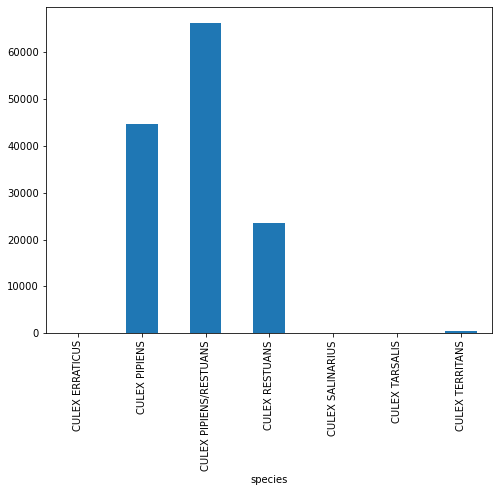

In [93]:
# plot of total mosquito count by species

plt.figure(figsize=(8,6))
mosquito_count.plot(kind='bar');

A large majority of mosquitos are of species *Culex Pipiens* and *Culex Restuans*, or a mixture of both.

In [94]:
# how many occurences of each species
# note that some occurences might be because of the overflow after 50 mosquitos

train.groupby('species')['wnvpresent'].count()

species
CULEX ERRATICUS              1
CULEX PIPIENS             2699
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX TERRITANS            222
Name: wnvpresent, dtype: int64

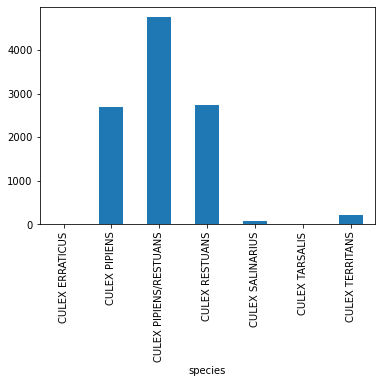

In [95]:
# number of occurrences of each species

train.groupby('species')['wnvpresent'].count().plot(kind='bar');

The graph of the number of occurrences has almost the same shape as the total mosquito count. However, it seems that *Culex Pipiens* occurs in larger numbers per count, compared to *Culex Restuans*.

In [96]:
# average number of mosquitos per count

(mosquito_count/train.groupby('species')['wnvpresent'].count()).sort_values()

species
CULEX TARSALIS             1.166667
CULEX SALINARIUS           1.686047
CULEX TERRITANS            2.297297
CULEX ERRATICUS            7.000000
CULEX RESTUANS             8.551460
CULEX PIPIENS/RESTUANS    13.945286
CULEX PIPIENS             16.550945
dtype: float64

*Culex Pipiens* occurs in the greatest numbers, followed by *Culex Restuans*.

In [97]:
# how many were positive by breed

train.groupby('species')['wnvpresent'].sum()

species
CULEX ERRATICUS             0
CULEX PIPIENS             240
CULEX PIPIENS/RESTUANS    262
CULEX RESTUANS             49
CULEX SALINARIUS            0
CULEX TARSALIS              0
CULEX TERRITANS             0
Name: wnvpresent, dtype: int64

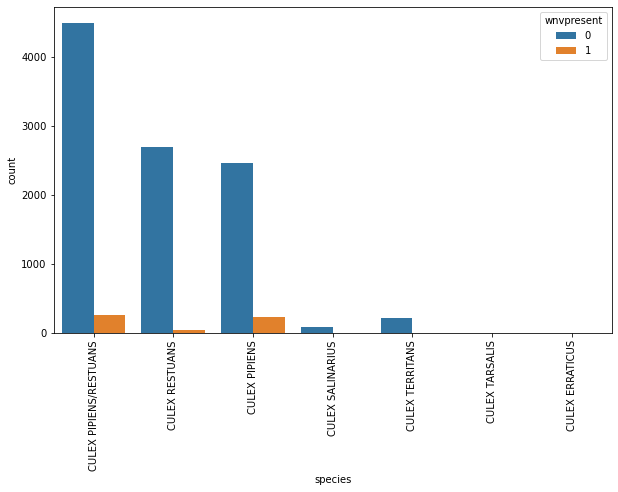

In [98]:
plt.figure(figsize=(10,6))

sns.countplot(data=train, x='species', hue='wnvpresent')
plt.xticks(rotation=90);

In [99]:
wnv_mosquito_count = train[['date', 'species', 'nummosquitos']]

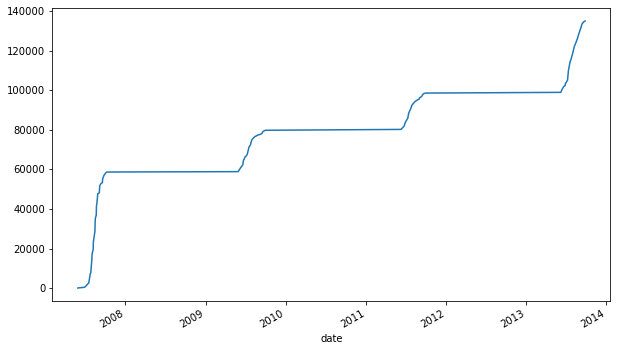

In [100]:
# plot of total mosquito cumulative count

train.groupby('date')['nummosquitos'].sum().cumsum().plot(figsize=(10, 6));

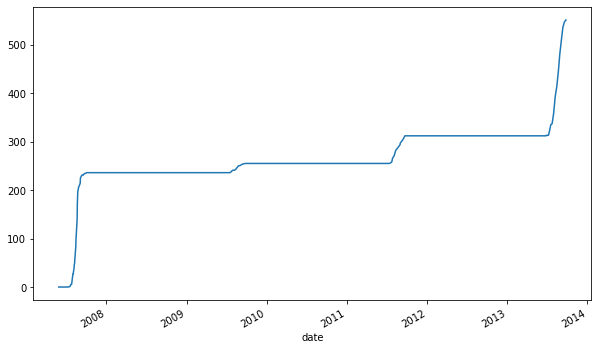

In [101]:
# plot of total wnv present cases

train.groupby('date')['wnvpresent'].sum().cumsum().plot(figsize=(10, 6));

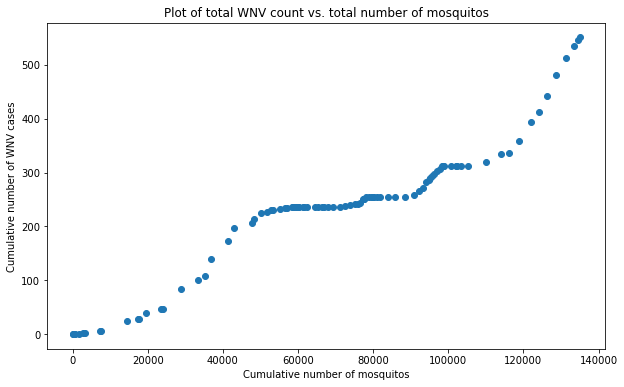

In [102]:
# combined plot of the number of mosquitos and cumulative count

plt.figure(figsize=(10, 6))
plt.scatter(train.groupby('date')['nummosquitos'].sum().cumsum(), train.groupby('date')['wnvpresent'].sum().cumsum());
plt.title('Plot of total WNV count vs. total number of mosquitos')
plt.xlabel('Cumulative number of mosquitos')
plt.ylabel('Cumulative number of WNV cases');

In [103]:
# cumulative count of each species by day

wnv_mosquito_count.groupby(['date', 'species'])['nummosquitos'].sum().unstack().cumsum()

species     CULEX ERRATICUS  CULEX PIPIENS  CULEX PIPIENS/RESTUANS  \
date                                                                 
2007-05-29              NaN            1.0                    10.0   
2007-06-05              NaN            7.0                    38.0   
2007-06-26              NaN           15.0                   107.0   
2007-06-29              NaN           21.0                   131.0   
2007-07-02              NaN           25.0                   263.0   
2007-07-11              NaN          108.0                  1042.0   
2007-07-18              NaN          235.0                  1599.0   
2007-07-19              NaN          324.0                  2151.0   
2007-07-25              NaN         3238.0                  3291.0   
2007-07-27              NaN         3244.0                  3453.0   
2007-08-01              NaN         6342.0                  6622.0   
2007-08-02              NaN         7529.0                  8128.0   
2007-08-03              NaN         7683.0                  8178.0   
2007-08-07              NaN         8540.0                  9058.0   
2007-08-08              NaN        11932.0                  9834.0   
2007-08-09              NaN        12153.0                 10075.0   
2007-08-15              NaN        14254.0                 12556.0   
2007-08-16              NaN        18607.0                 12758.0   
2007-08-17              NaN        19914.0                 13318.0   
2007-08-21              NaN        20716.0                 14155.0   
2007-08-22              NaN        24351.0                 15013.0   
2007-08-24              NaN        25066.0                 15749.0   
2007-08-28              NaN        28881.0                 16672.0   
2007-09-04              NaN        29231.0                 16829.0   
2007-09-05              NaN        31114.0                 16965.0   
2007-09-06              NaN        31588.0                 17992.0   
2007-09-12              NaN        32482.0                 18287.0   
2007-09-18              NaN        32702.0                 18441.0   
2007-09-19              NaN        33863.0                 19009.0   
2007-09-24              NaN        34923.0                 19506.0   
2007-09-25              NaN        35024.0                 19735.0   
2007-10-04              NaN        35674.0                 20432.0   
2007-10-09              NaN        35871.0                 20565.0   
2009-05-28              NaN        35874.0                 20669.0   
2009-06-02              NaN        35902.0                 20995.0   
2009-06-03              NaN            NaN                 21260.0   
2009-06-05              NaN        35919.0                 21393.0   
2009-06-12              NaN        35977.0                 21920.0   
2009-06-15              NaN        36011.0                 22122.0   
2009-06-19              NaN        36024.0                 22585.0   
2009-06-22              NaN            NaN                 24605.0   
2009-06-26              NaN        36038.0                 25163.0   
2009-06-29              NaN        36044.0                 26017.0   
2009-07-06              NaN        36077.0                 26462.0   
2009-07-10              NaN        36101.0                 27217.0   
2009-07-13              NaN        36132.0                 28362.0   
2009-07-17              NaN        36196.0                 29730.0   
2009-07-24              NaN        36226.0                 30641.0   
2009-07-27              NaN        36298.0                 31722.0   
2009-07-31              NaN        36378.0                 32537.0   
2009-08-07              NaN        36453.0                 33097.0   
2009-08-13              NaN        36480.0                 33559.0   
2009-08-25              NaN        36515.0                 34120.0   
2009-08-27              NaN        36526.0                 34265.0   
2009-09-03              NaN        36544.0                 34328.0   
2009-09-14

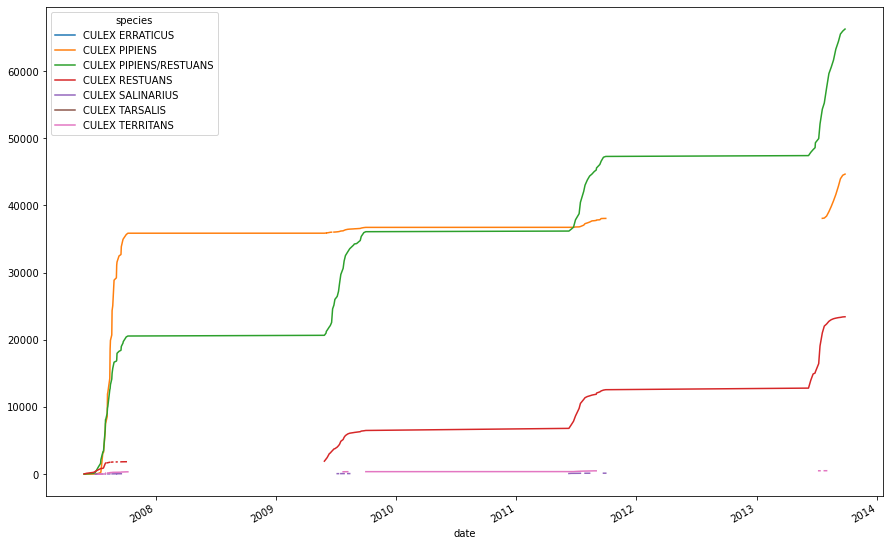

In [104]:
wnv_mosquito_count.groupby(['date', 'species'])['nummosquitos'].sum().unstack().cumsum().plot(figsize=(15, 10));

We don't have data for years 2008, 2010, 2012, 2014 (as these are in the test set - hence these would show up as flat portions in the above graph).

In 2008, the rate of increase for *Culex Pipiens* was a lot higher than for *Culex Restuans*.

For the other species, it can be seen that the rate is relatively constant throughout (almost flat, compared to the dominant two species).

In [105]:
wnv_virus_count = train[['date', 'species', 'wnvpresent']]

In [106]:
# cumulative count of wnvpresent by species by day

wnv_virus_count.groupby(['date', 'species'])['wnvpresent'].sum().unstack().cumsum()

species     CULEX ERRATICUS  CULEX PIPIENS  CULEX PIPIENS/RESTUANS  \
date                                                                 
2007-05-29              NaN            0.0                     0.0   
2007-06-05              NaN            0.0                     0.0   
2007-06-26              NaN            0.0                     0.0   
2007-06-29              NaN            0.0                     0.0   
2007-07-02              NaN            0.0                     0.0   
2007-07-11              NaN            0.0                     0.0   
2007-07-18              NaN            0.0                     1.0   
2007-07-19              NaN            0.0                     1.0   
2007-07-25              NaN            3.0                     3.0   
2007-07-27              NaN            3.0                     3.0   
2007-08-01              NaN            7.0                    17.0   
2007-08-02              NaN            8.0                    19.0   
2007-08-03              NaN            8.0                    19.0   
2007-08-07              NaN           17.0                    21.0   
2007-08-08              NaN           22.0                    23.0   
2007-08-09              NaN           23.0                    23.0   
2007-08-15              NaN           45.0                    34.0   
2007-08-16              NaN           60.0                    35.0   
2007-08-17              NaN           66.0                    36.0   
2007-08-21              NaN           82.0                    51.0   
2007-08-22              NaN          105.0                    61.0   
2007-08-24              NaN          121.0                    70.0   
2007-08-28              NaN          127.0                    73.0   
2007-09-04              NaN          131.0                    77.0   
2007-09-05              NaN          139.0                    79.0   
2007-09-06              NaN          140.0                    80.0   
2007-09-12              NaN          142.0                    83.0   
2007-09-18              NaN          142.0                    83.0   
2007-09-19              NaN          143.0                    83.0   
2007-09-24              NaN          145.0                    83.0   
2007-09-25              NaN          145.0                    83.0   
2007-10-04              NaN          147.0                    83.0   
2007-10-09              NaN          147.0                    83.0   
2009-05-28              NaN          147.0                    83.0   
2009-06-02              NaN          147.0                    83.0   
2009-06-03              NaN            NaN                    83.0   
2009-06-05              NaN          147.0                    83.0   
2009-06-12              NaN          147.0                    83.0   
2009-06-15              NaN          147.0                    83.0   
2009-06-19              NaN          147.0                    83.0   
2009-06-22              NaN            NaN                    83.0   
2009-06-26              NaN          147.0                    83.0   
2009-06-29              NaN          147.0                    83.0   
2009-07-06              NaN          147.0                    83.0   
2009-07-10              NaN          147.0                    83.0   
2009-07-13              NaN          147.0                    83.0   
2009-07-17              NaN          147.0                    83.0   
2009-07-24              NaN          147.0                    85.0   
2009-07-27              NaN          147.0                    86.0   
2009-07-31              NaN          147.0                    87.0   
2009-08-07              NaN          147.0                    87.0   
2009-08-13              NaN          147.0                    88.0   
2009-08-25              NaN          147.0                    94.0   
2009-08-27              NaN          147.0                    94.0   
2009-09-03              NaN          147.0                    94.0   
2009-09-14

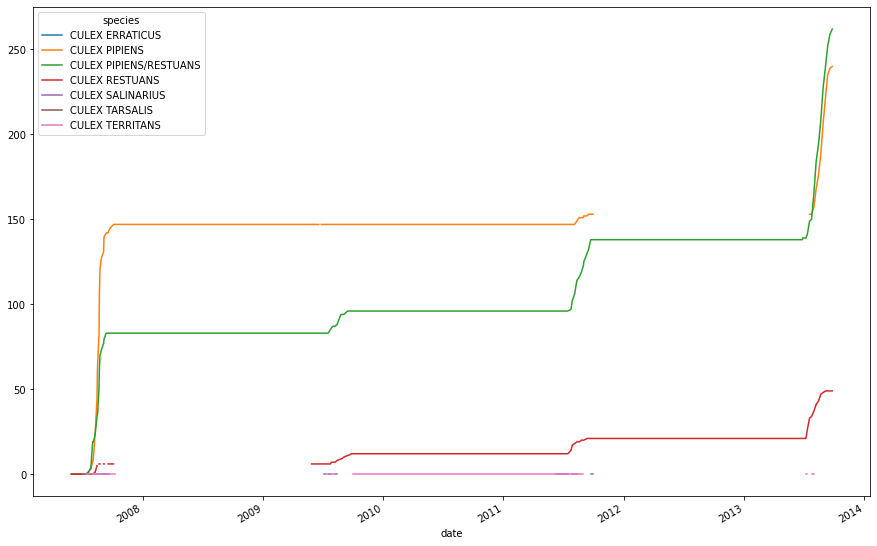

In [107]:
wnv_virus_count.groupby(['date', 'species'])['wnvpresent'].sum().unstack().cumsum().plot(figsize=(15, 10));

#### Conclusions:



Rate of increase of WNV is high in 2007 and 2013.

Rate of increase for *Culex Restuans* is slightly slower than for *Culex Pipiens*.

The other species all do not exhibit any WNV. As such, we may want to focus our efforts on only analyzing *Culex Restuans* and *Culex Pipiens*.

## 8. Weather EDA
[top](#Contents)

In this part, we will look at the weather dataset, and see the effect of each of the variables on the mosquito breeding.

### 8.1. Load the combined weather file 
[top](#Contents)

We have combined the weather and the trap data (the detailed workings are noted in Part 2 - Prepocessing workbook). We will look into the file and see the change to the mosquito number with respect to the change in weather.

In [108]:
# read in dataset from .csv file

wnv = pd.read_csv('../datasets/train_final.csv')

In [109]:
wnv['date'] = pd.to_datetime(wnv['date'])

In [110]:
wnv.set_index('date', inplace=True)

In [111]:
wnv.head(10)

maxtemp  mintemp  avgtemp  dewpoint  wetbulb  stnpressure  \
date                                                                    
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   
2007-05-29       88       60     75.5      58.5     65.5       29.415   

            avgspeed  daylength  precipitation  maxtemp_roll_7  \
date                                                             
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   
2007-05-29      6.95      896.0            0.0       79.857143   

            mintemp_roll_7  avgtemp_roll_7  dewpoint_roll_7  wetbulb_roll_7  \
date                                                                          
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   
2007-05-29       56.428571       68.714286        50.928571       58.857143   

            stnpressure_roll_7  avgspeed_roll_7  daylength_roll_7  \
date                                                                
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   
2007-05-29           29.435714         9.328571        892.142857   

            precipitation_roll_7  maxtemp_roll_14  mintemp_roll_14  \
date                                                                 
2007-05-29              0.109714        76.714286        51.571429   
2007-05-29              0.109714        76.714286        51.571429   
2007-05-29              0.109714        76.714286        51.571429   
2007-05-29              0.109714        76.714286        51.571429   
2007-05-29              0.109714        76.714286        51.571429   
2007-05-29              0.109714        76.714286        51.571429   
2007

In [112]:
wnv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8188 entries, 2007-05-29 to 2013-09-26
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   maxtemp                8188 non-null   int64  
 1   mintemp                8188 non-null   int64  
 2   avgtemp                8188 non-null   float64
 3   dewpoint               8188 non-null   float64
 4   wetbulb                8188 non-null   float64
 5   stnpressure            8188 non-null   float64
 6   avgspeed               8188 non-null   float64
 7   daylength              8188 non-null   float64
 8   precipitation          8188 non-null   float64
 9   maxtemp_roll_7         8188 non-null   float64
 10  mintemp_roll_7         8188 non-null   float64
 11  avgtemp_roll_7         8188 non-null   float64
 12  dewpoint_roll_7        8188 non-null   float64
 13  wetbulb_roll_7         8188 non-null   float64
 14  stnpressure_roll_7     8188 non-null  

In [113]:
wnv.columns

Index(['maxtemp', 'mintemp', 'avgtemp', 'dewpoint', 'wetbulb', 'stnpressure',
       'avgspeed', 'daylength', 'precipitation', 'maxtemp_roll_7',
       'mintemp_roll_7', 'avgtemp_roll_7', 'dewpoint_roll_7', 'wetbulb_roll_7',
       'stnpressure_roll_7', 'avgspeed_roll_7', 'daylength_roll_7',
       'precipitation_roll_7', 'maxtemp_roll_14', 'mintemp_roll_14',
       'avgtemp_roll_14', 'dewpoint_roll_14', 'wetbulb_roll_14',
       'stnpressure_roll_14', 'avgspeed_roll_14', 'daylength_roll_14',
       'precipitation_roll_14', 'nummosquitos', 'wnvpresent',
       'species_wnv_species', 'trap_wnv_traps', 'month_peak'],
      dtype='object')

### 8.2. Effect of the temperature to the mosquito 
[top](#Contents)

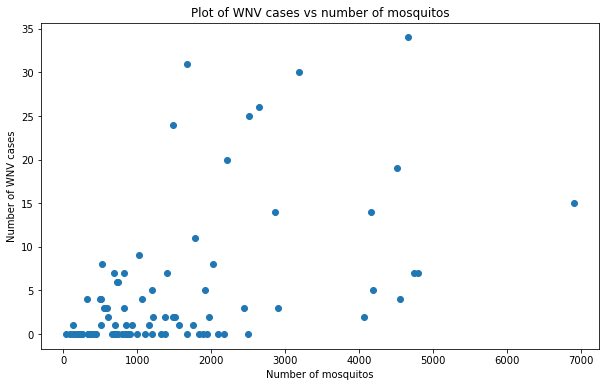

In [114]:
# plot of WNV cases vs number of mosquitoes

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['nummosquitos'].sum(), wnv.groupby('date')['wnvpresent'].sum());
plt.title('Plot of WNV cases vs number of mosquitos')
plt.xlabel('Number of mosquitos')
plt.ylabel('Number of WNV cases');

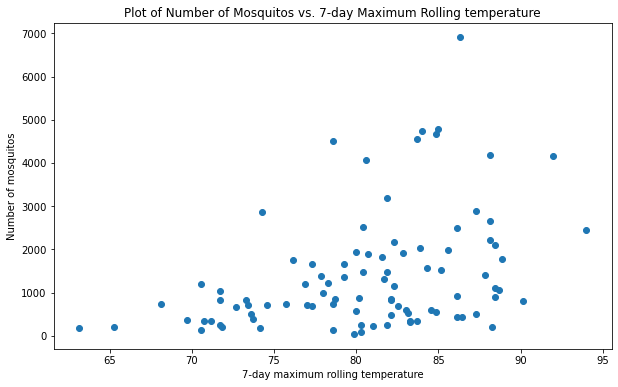

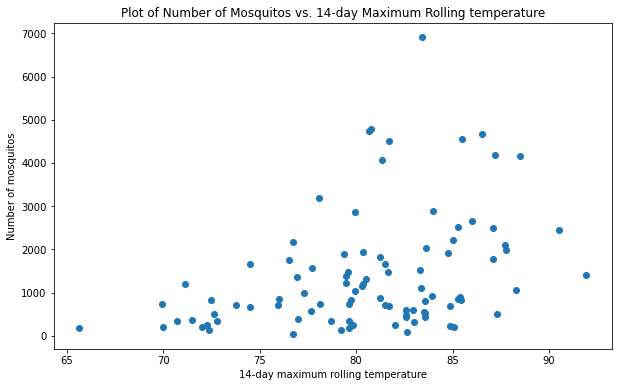

In [115]:
# plot of 7/14-day rolling max temperature vs. total number of mosquitos for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['maxtemp_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of Number of Mosquitos vs. 7-day Maximum Rolling temperature')
plt.xlabel('7-day maximum rolling temperature')
plt.ylabel('Number of mosquitos');

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['maxtemp_roll_14'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of Number of Mosquitos vs. 14-day Maximum Rolling temperature')
plt.xlabel('14-day maximum rolling temperature')
plt.ylabel('Number of mosquitos');


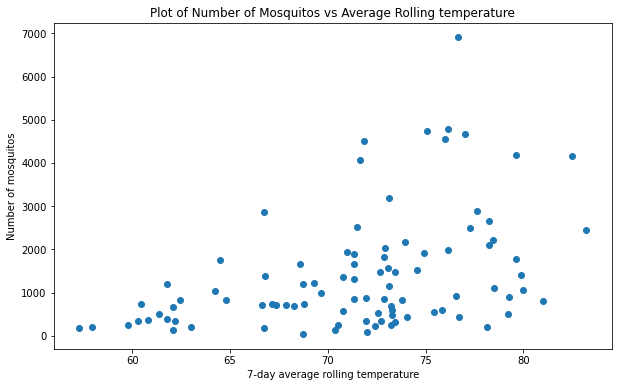

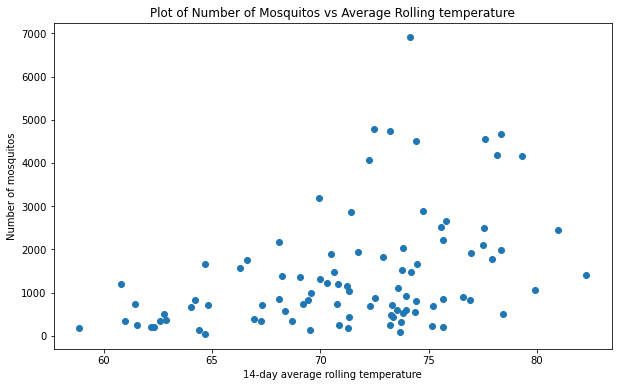

In [116]:
# plot of 7/14-day rolling average temperature vs. total number of mosquitos for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['avgtemp_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of Number of Mosquitos vs Average Rolling temperature')
plt.xlabel('7-day average rolling temperature')
plt.ylabel('Number of mosquitos');

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['avgtemp_roll_14'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of Number of Mosquitos vs Average Rolling temperature')
plt.xlabel('14-day average rolling temperature')
plt.ylabel('Number of mosquitos');

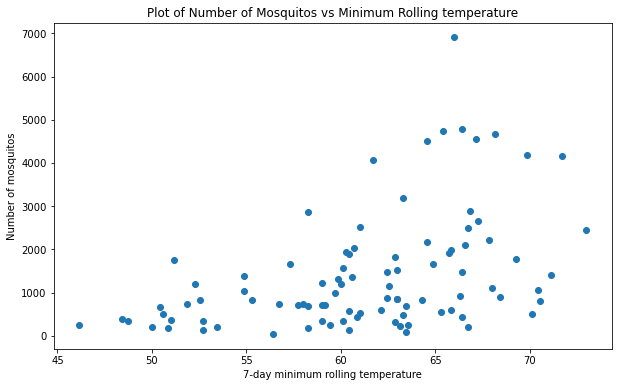

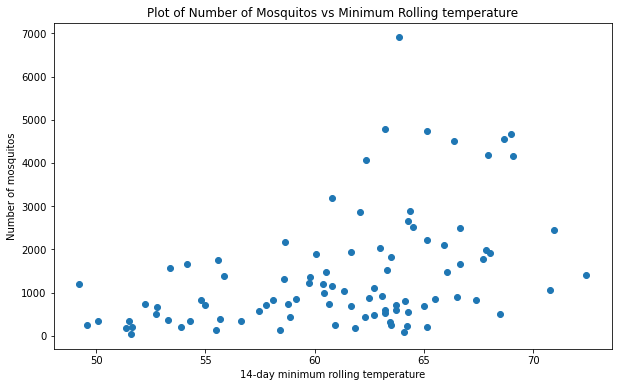

In [117]:
# plot of 7/14-day rolling min temperature vs. total number of mosquitos for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['mintemp_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of Number of Mosquitos vs Minimum Rolling temperature')
plt.xlabel('7-day minimum rolling temperature')
plt.ylabel('Number of mosquitos');

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['mintemp_roll_14'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of Number of Mosquitos vs Minimum Rolling temperature')
plt.xlabel('14-day minimum rolling temperature')
plt.ylabel('Number of mosquitos');



#### Interpretation:

There is a slightly trend between number of mosquitos and the rolling temperatures which looks somewhat linear. 

The different plots also all have very similar shapes. There is likely very high collinearity and we can choose to take only average temperature as the representative temperature, since it shows the highest correlation coefficient with both `maxtemp_roll` and `mintemp_roll`.

### 8.3. Effect of the temperature to the number of WNV cases 
[top](#Contents)

In [118]:
# plot of 7-day rolling avg temperature vs. total number of WNV cases (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['avgtemp_roll_7'].mean(), wnv.groupby('date')['wnvpresent'].sum());
plt.title('Plot of Number of WNV present vs Average Rolling temperature')
plt.xlabel('7-day average rolling temperature')
plt.ylabel('Number of WNV present');

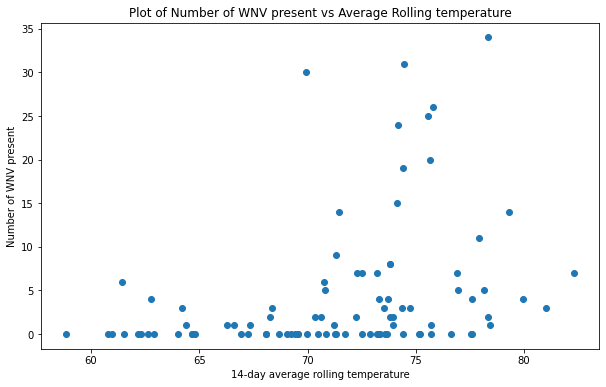

In [119]:
# plot of 14-day rolling avg temperature vs. total number of WNV cases (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['avgtemp_roll_14'].mean(), wnv.groupby('date')['wnvpresent'].sum());
plt.title('Plot of Number of WNV present vs Average Rolling temperature')
plt.xlabel('14-day average rolling temperature')
plt.ylabel('Number of WNV present');


#### Interpretations:

Similarly, there is a somewhat positive trend between number of WNV occurrences and the 7-day rolling average temperature. There are more occurrences where the WNV count is 0 but mosquito count is non-zero.

WNV cases seem to only occur beyond 60 degrees F.

### 8.4. Boxplot of rolling temperature to the number of WNV cases 
[top](#Contents)

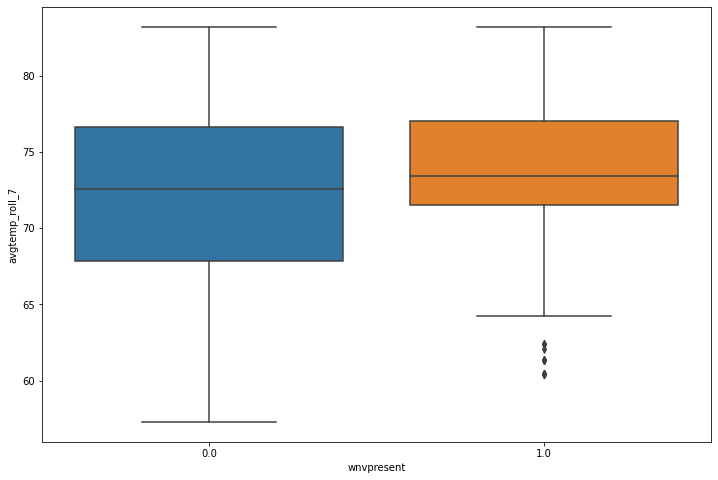

In [120]:
# boxplot of 7-day rolling avg temperature vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['avgtemp_roll_7'], x=wnv['wnvpresent']);

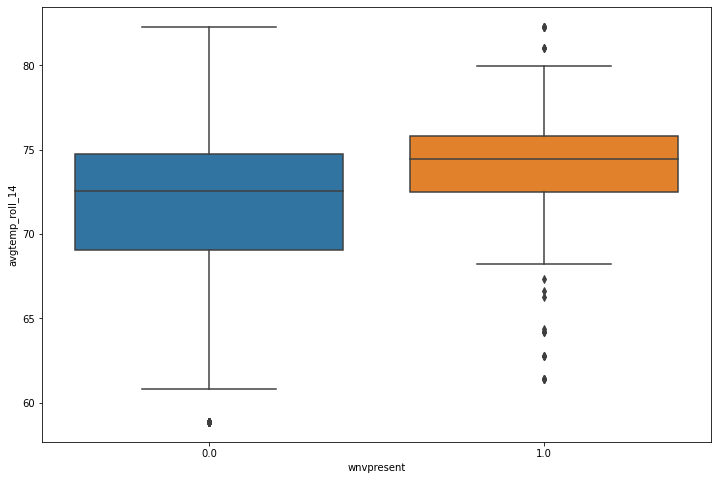

In [121]:
# boxplot of 14-day rolling avg temperature vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['avgtemp_roll_14'], x=wnv['wnvpresent']);

#### Interpretations:

Boxplots reveal that the median 14-day rolling temperature is about 2 degrees F higher for cases where WNV is present compared to cases where WNV is not present.

The IQR is also concentrated in a smaller, higher range for positive cases.

### 8.5. Boxplot of number of WNV cases vs Peak Month
[top](#Contents)

C:\Users\param\Anaconda3\envs\geo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


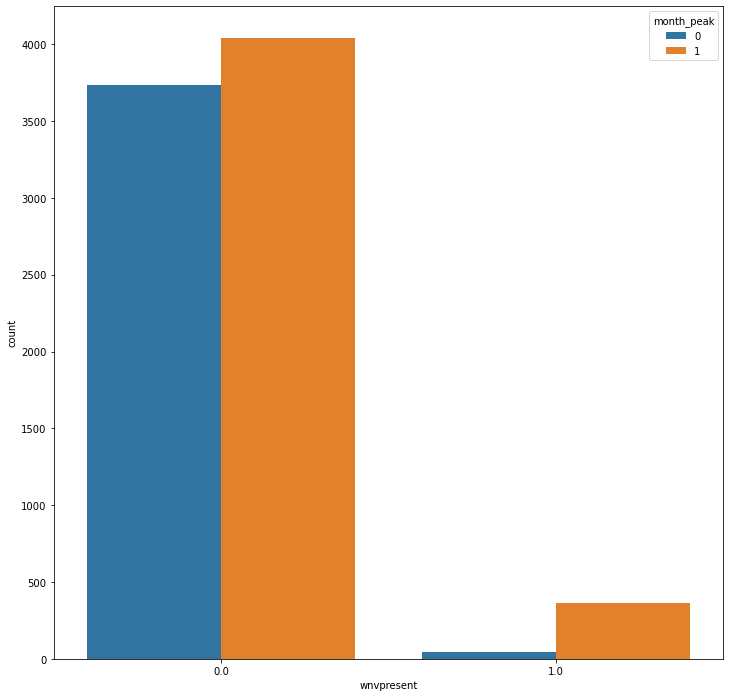

In [122]:
# boxplot of WNV positive vs peak month (Aug, Sep are peak months)

plt.figure(figsize=(12, 12))

sns.countplot(wnv['wnvpresent'], hue=wnv['month_peak']);

#### Interpretations:

During the peak months of Aug and Sep, the relative occurrence of WNV positive cases is far greater.

### 8.6. Plot of temperature with Date
[top](#Contents)

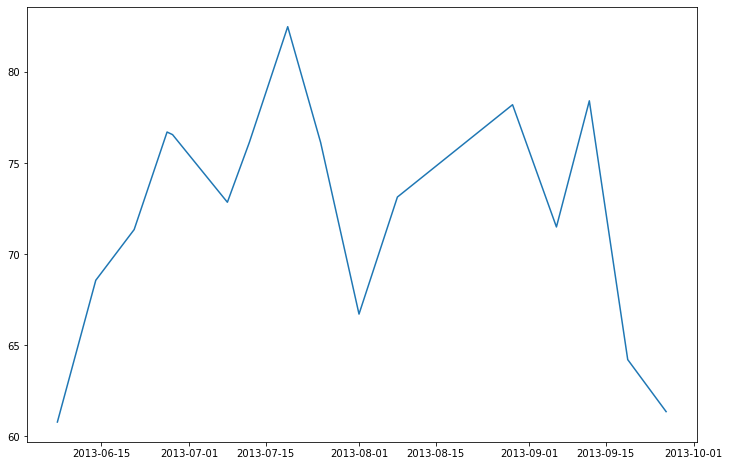

In [123]:
# plot of temperature with the date

plt.figure(figsize=(12, 8))
plt.plot(wnv['avgtemp_roll_7']['2013-01-01': '2013-12-31']);

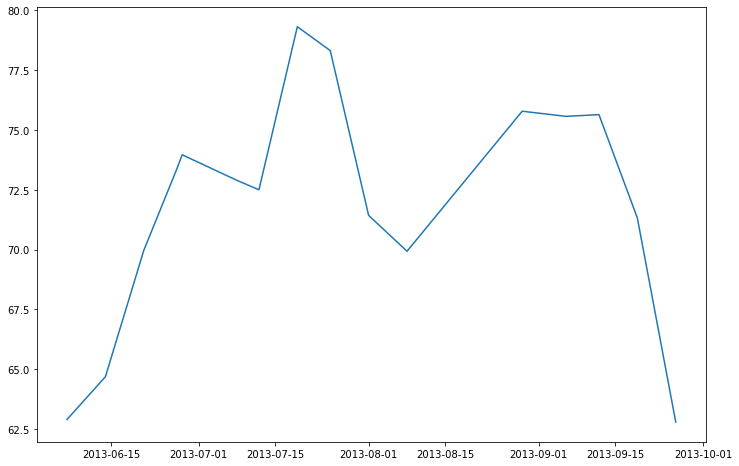

In [124]:
# plot of temperature with the date

plt.figure(figsize=(12, 8))
plt.plot(wnv['avgtemp_roll_14']['2013-01-01': '2013-12-31']);

In 2013, the temperature peaks in Jul and September.

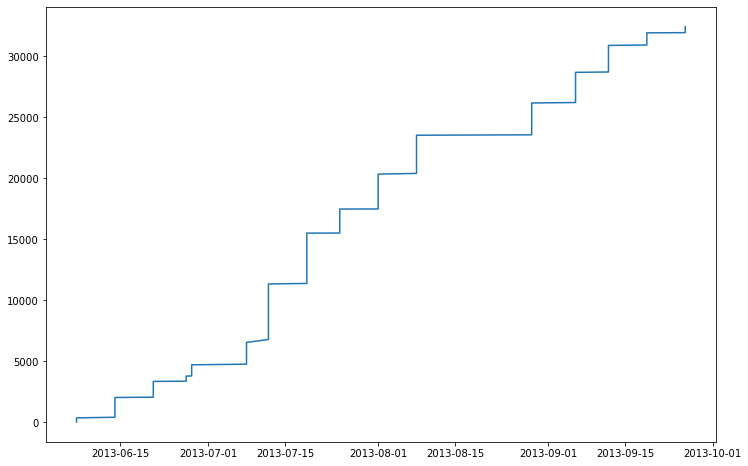

In [125]:
# plot cumulative sum of the mosquitos in 2013

plt.figure(figsize=(12, 8))
plt.plot(wnv['2013-01-01': '2013-12-31']['nummosquitos'].cumsum());

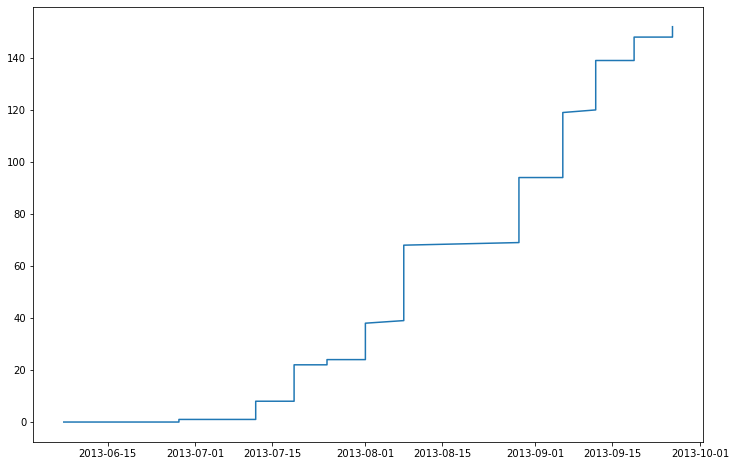

In [126]:
# plot cumulative sum of the WNV cases in 2013

plt.figure(figsize=(12, 8))
plt.plot(wnv['2013-01-01': '2013-12-31']['wnvpresent'].cumsum());

From the testing data available, sharper spikes in WNV cases occurred in Aug and Sep in 2013.

### 8.7. Analyze of Wet Bulb Temp, Dew Point Temp and Dry Bulb Temp
[top](#Contents)

***Reference regarding wet bulb temp, dew point temp and dry bulb temp***

The below information serves as a reference to understand the distinction between wet bulb temperature, dew point temperature as well as dry bulb temperature.

The Wet Bulb temperature is always between the Dry Bulb temperature and the Dew Point.

**Dry Bulb Temperature - $T_{db}$**

The Dry Bulb temperature, usually referred to as "air temperature", is the air property that is most commonly used. When people refer to the temperature of the air they are normally referring to the dry bulb temperature.

The Dry Bulb Temperature refers basically to the ambient air temperature. It is called "Dry Bulb" because the air temperature is indicated by a thermometer not affected by the moisture of the air.

**Wet Bulb Temperature - $T_{wb}$**

The Wet Bulb temperature is the adiabatic saturation temperature.

Wet Bulb temperature can be measured by using a thermometer with the bulb wrapped in wet muslin. The adiabatic evaporation of water from the thermometer bulb and the cooling effect is indicated by a "wet bulb temperature" lower than the "dry bulb temperature" in the air.

The rate of evaporation from the wet bandage on the bulb, and the temperature difference between the dry bulb and wet bulb, depends on the humidity of the air. The evaporation from the wet muslin is reduced when air contains more water vapor.

The wet bulb temperature is the temperature of an object that can be achieved through evaporative cooling, assuming good air flow and that the ambient air temperature remains the same.

**Dew Point Temperature - $T_{dp}$**

The Dew Point is the temperature where water vapor starts to condense out of the air (the temperature at which air becomes completely saturated). Above this temperature the moisture stays in the air.

If the dew-point temperature is close to the dry air temperature - the relative humidity is high.

If the dew point is well below the dry air temperature - the relative humidity is low.

In [127]:
# plot of 7-day rolling wet bulb temperature vs. total number of mosquitos for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['wetbulb_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());

There is no discernable difference in the trend for wet bulb temperature. 

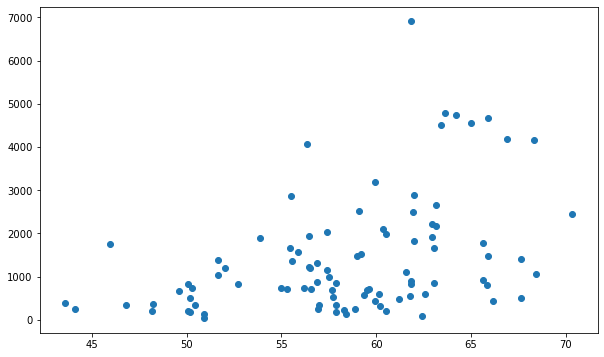

In [128]:
# plot of 7-day rolling dew point temperature vs. total number of mosquitos for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['dewpoint_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());

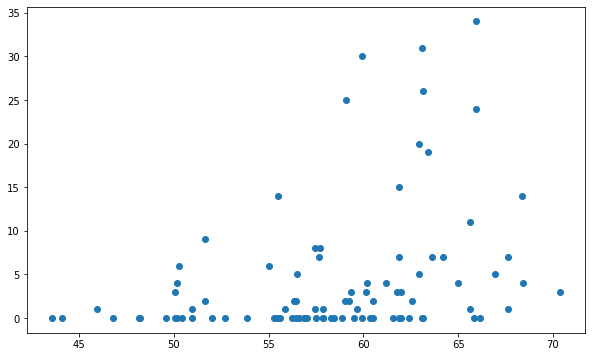

In [129]:
# plot of 7-day rolling dew point temperature vs. total number of WNV occurrences for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['dewpoint_roll_7'].mean(), wnv.groupby('date')['wnvpresent'].sum());

There is no discernable difference in the trend for dew point temperature.

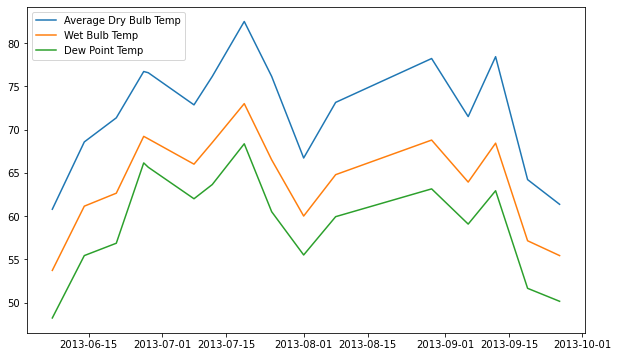

In [130]:
# compare dew point temperature, wet bulb and dry bulb temperature

plt.figure(figsize=(10, 6))
plt.plot(wnv['avgtemp_roll_7']['2013-01-01': '2013-12-31'], label='Average Dry Bulb Temp');
plt.plot(wnv['wetbulb_roll_7']['2013-01-01': '2013-12-31'], label='Wet Bulb Temp');
plt.plot(wnv['dewpoint_roll_7']['2013-01-01': '2013-12-31'], label='Dew Point Temp');
plt.legend();

We note that all three graphs show very similar shapes. As such, there was little changes in relative humidity throughout this period, if any, and this did not have a significant impact on the number of mosquitos or cases of WNV presence.

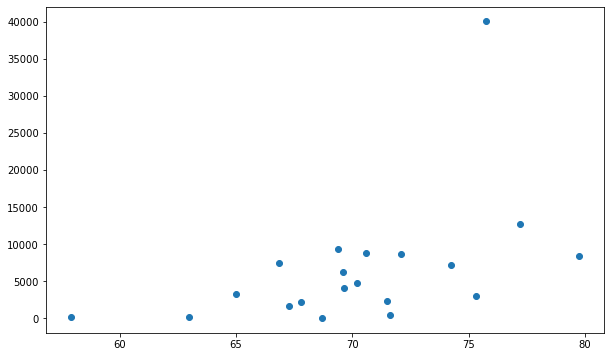

In [131]:
# sample by month - number of mosquitoes

plt.figure(figsize=(10, 6))
plt.scatter(wnv.resample('M').mean()['avgtemp_roll_7'], wnv.resample('M').sum()['nummosquitos']);

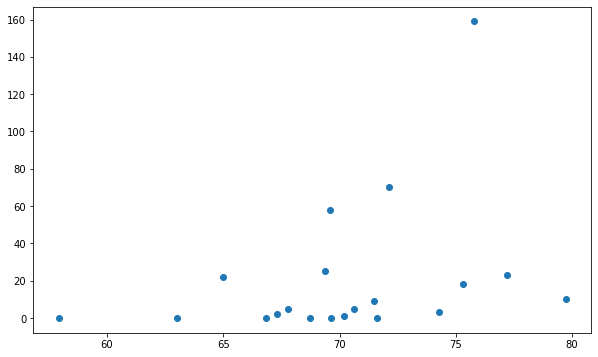

In [132]:
# sample by month - number of WNV cases

plt.figure(figsize=(10, 6))
plt.scatter(wnv.resample('M').mean()['avgtemp_roll_7'], wnv.resample('M').sum()['wnvpresent']);

#### Interpretations:

Monthly trends are not as obvious. There is one month with a huge spike in number of mosquitoes/cases (Aug 2007).

However, it is possible that this was since the sampling was done quite sporadically.

### 8.8. Analyze the Pressure
[top](#Contents)

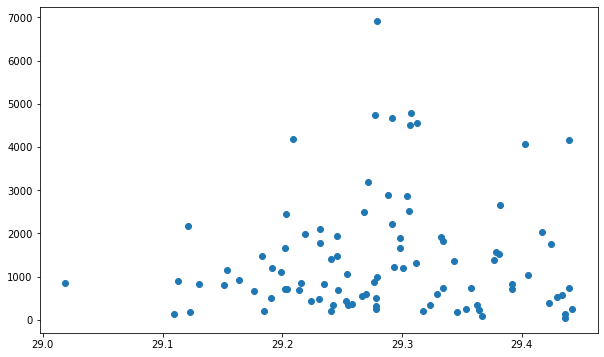

In [133]:
# plot of pressure vs. total number of mosquitoes for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['stnpressure_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());

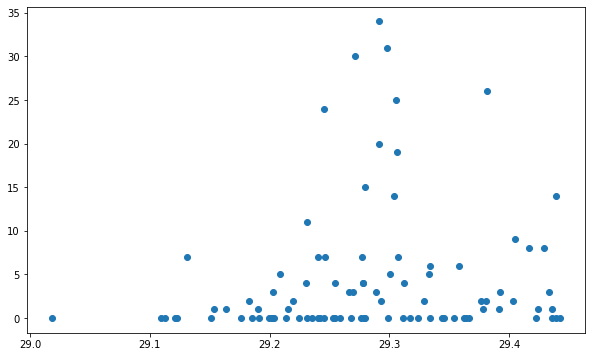

In [134]:
# plot of pressure vs. total number of WNV occurrences for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['stnpressure_roll_7'].mean(), wnv.groupby('date')['wnvpresent'].sum());

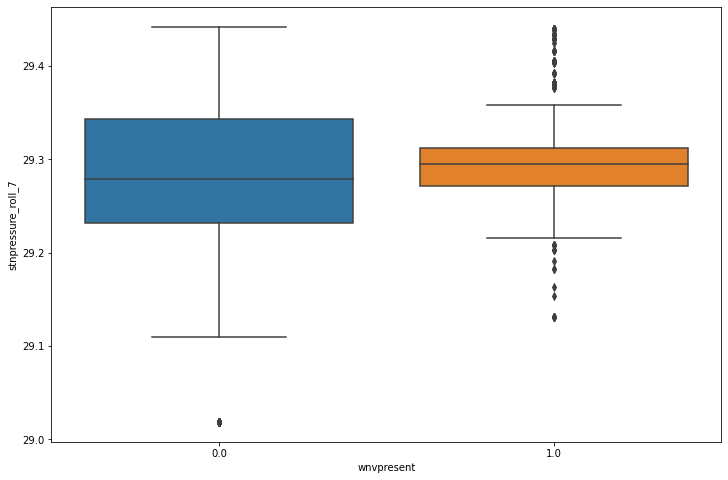

In [135]:
# boxplot of 7 day rolling pressure vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['stnpressure_roll_7'], x=wnv['wnvpresent']);

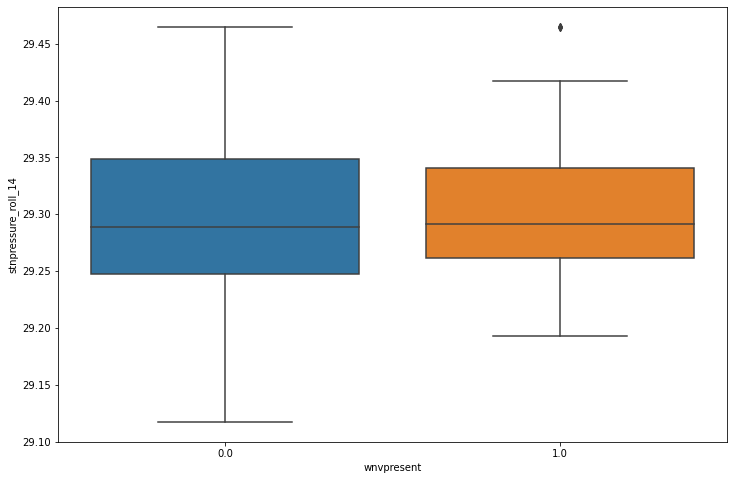

In [136]:
# boxplot of day length vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['stnpressure_roll_14'], x=wnv['wnvpresent']);

#### Interpretations:

There is no clear trend. Number of mosquitos / WNV presence is unlikely to correlate with the atmospheric pressure.

### 8.9. Analyze the Day Length
[top](#Contents)

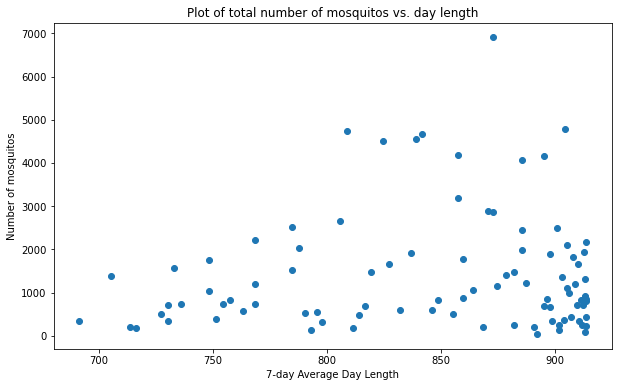

In [137]:
# plot of day length vs total number of mosquitoes for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['daylength_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of total number of mosquitos vs. day length')
plt.xlabel('7-day Average Day Length')
plt.ylabel('Number of mosquitos');

#### Interpreataion:

We see a cluster of mosquitoes (lower counts of about 2000 or below) at the 900 min and above area.

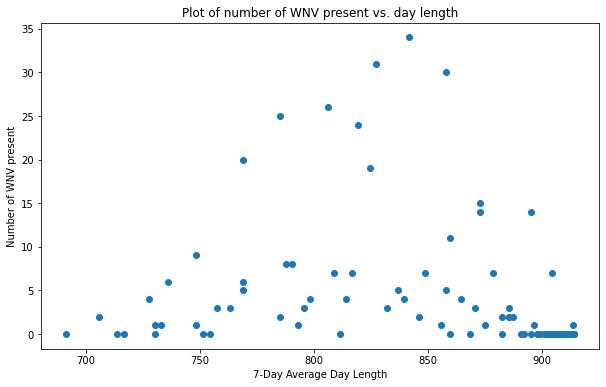

In [138]:
# plot of day length vs total number of WNV occurrences for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['daylength_roll_7'].mean(), wnv.groupby('date')['wnvpresent'].sum());
plt.title('Plot of number of WNV present vs. day length')
plt.xlabel('7-Day Average Day Length')
plt.ylabel('Number of WNV present');

#### Interpreataion:

Scatter plot reveals an interesting triangle-like shape. Peaks when day length is about 825 minutes, then falls again.

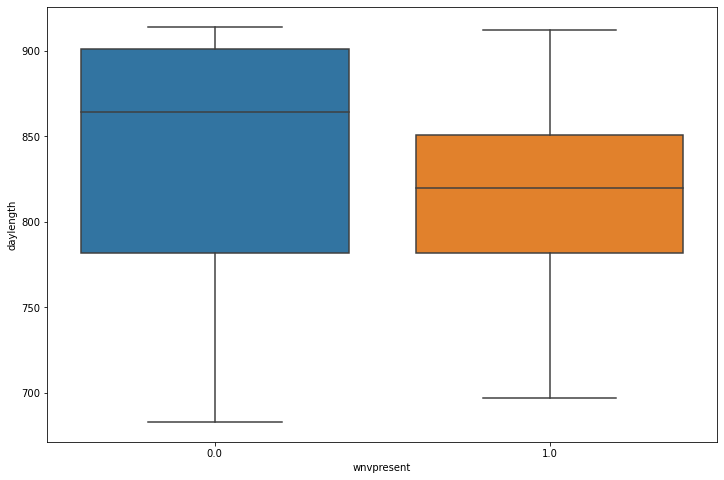

In [139]:
# boxplot of day length vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['daylength'], x=wnv['wnvpresent']);

#### Interpreataion:

Much larger spread of Daylength observed for cases where there is no WNV. Median daylength is also higher.

### 8.10. Analyze the Wind Speed
[top](#Contents)

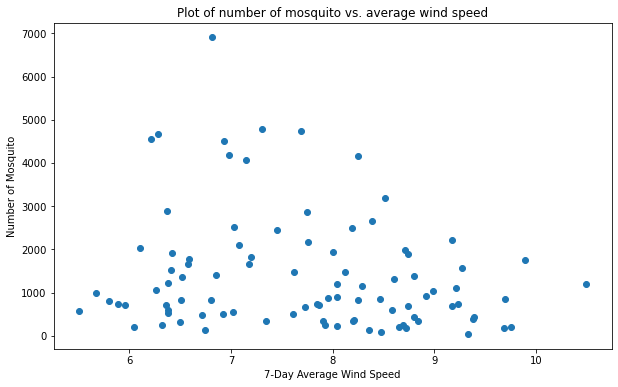

In [140]:
# plot of wind speed vs total number of mosquitoes for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['avgspeed_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of number of mosquito vs. average wind speed')
plt.xlabel('7-Day Average Wind Speed')
plt.ylabel('Number of Mosquito');

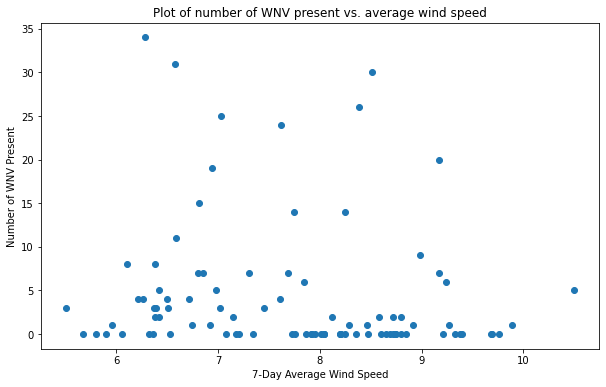

In [141]:
# plot of wind speed vs total number of WNV occurrences for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['avgspeed_roll_7'].mean(), wnv.groupby('date')['wnvpresent'].sum());
plt.title('Plot of number of WNV present vs. average wind speed')
plt.xlabel('7-Day Average Wind Speed')
plt.ylabel('Number of WNV Present');

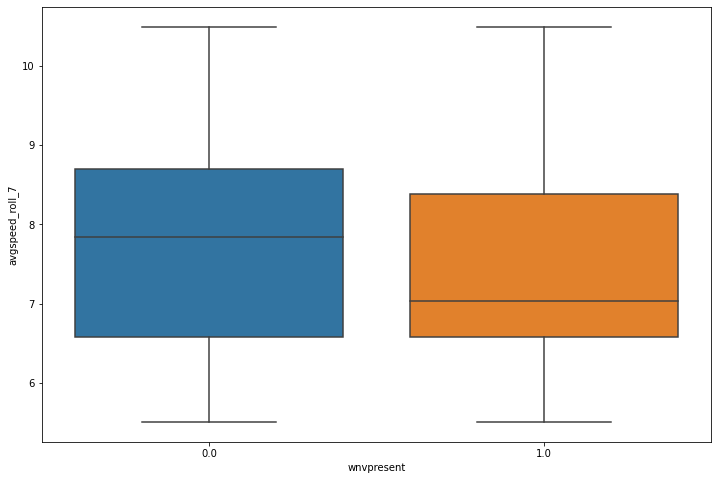

In [142]:
# boxplot of 7-day wind speed vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['avgspeed_roll_7'], x=wnv['wnvpresent']);

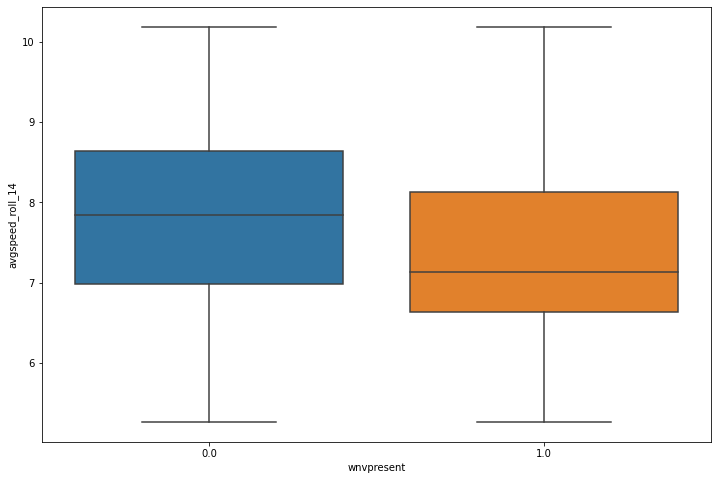

In [143]:
# boxplot of 14-day wind speed vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['avgspeed_roll_14'], x=wnv['wnvpresent']);

#### Interpretation:

Median 7 day and 14 day rolling wind speed is slightly lower for WNV positive occurrences.

### 8.11. Analyze the Precipitation
[top](#Contents)

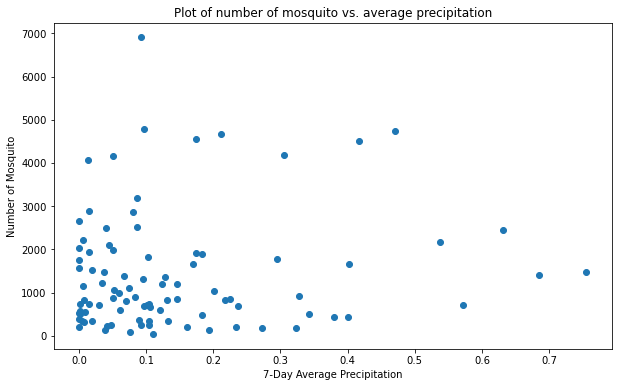

In [144]:
# plot of precipitation vs total number of mosquitoes for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['precipitation_roll_7'].mean(), wnv.groupby('date')['nummosquitos'].sum());
plt.title('Plot of number of mosquito vs. average precipitation')
plt.xlabel('7-Day Average Precipitation')
plt.ylabel('Number of Mosquito');

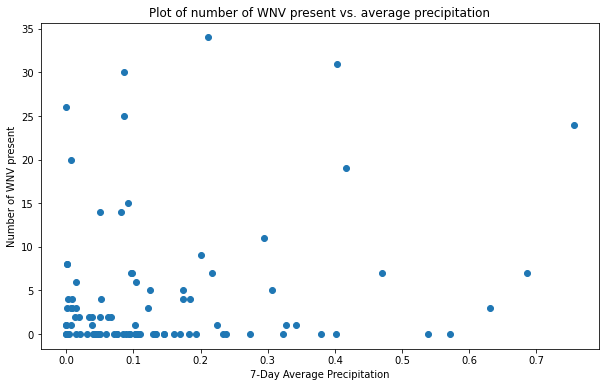

In [145]:
# plot of precipitation vs total number of WNV occurrences for the day (regardless of species)

plt.figure(figsize=(10, 6))
plt.scatter(wnv.groupby('date')['precipitation_roll_7'].mean(), wnv.groupby('date')['wnvpresent'].sum());
plt.title('Plot of number of WNV present vs. average precipitation')
plt.xlabel('7-Day Average Precipitation')
plt.ylabel('Number of WNV present');

#### Interpretation:

We do see more occurrences of mosquitoes when rainfall is low (between 0.1 to 0.3).

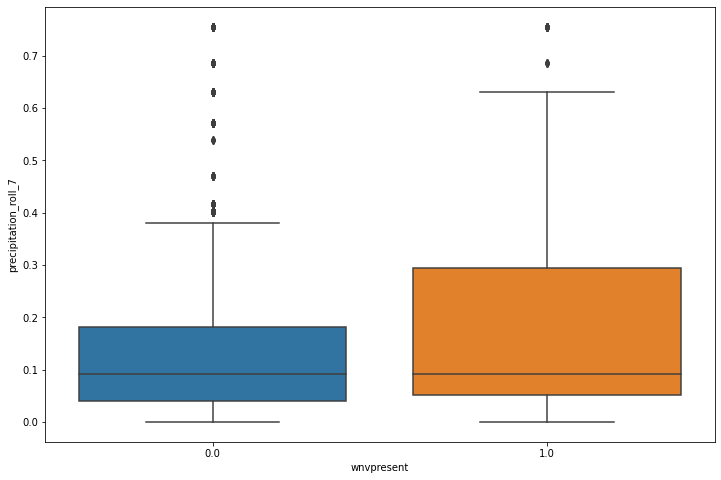

In [146]:
# boxplot of 7-day precipitation vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['precipitation_roll_7'], x=wnv['wnvpresent']);

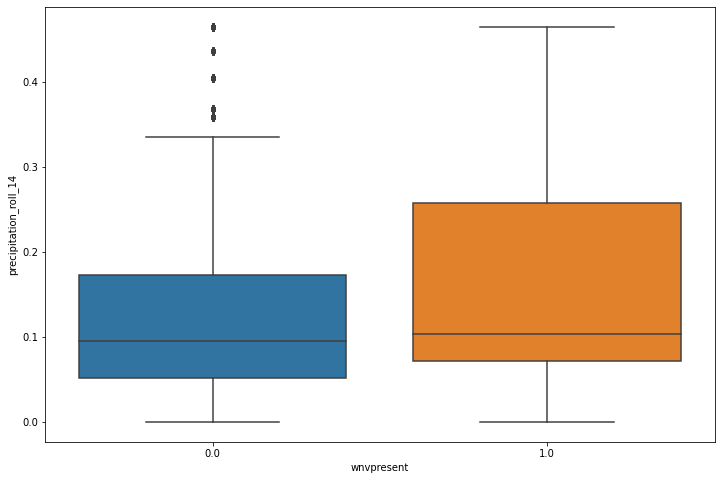

In [147]:
# boxplot of 14-day precipitation vs. WNV positive or not

plt.figure(figsize=(12, 8))

sns.boxplot(y=wnv['precipitation_roll_14'], x=wnv['wnvpresent']);

#### Interpretation:

The 14-day rolling precipitation IQR for WNV positive cases is greater than for WNV non-positive cases.

However, median precipitation is almost equal.

## 9. References
[top](#Contents)

[1] Birds in Chicago. https://storymaps.arcgis.com/stories/4b167081562a409bac6851e392d51cd3

[2] Migratory birds in US https://www.nationalgeographic.com/magazine/2018/03/bird-migration-interactive-maps/

[3] Cost of WNV disease among hospitalized patients https://www.cmmcp.org/sites/g/files/vyhlif2966/f/uploads/cost_of_wnv_disease_among_hospitalized_patients.pdf

[4] General info about West Nile Virus https://www.cdc.gov/westnile/index.html

[5] What is West Nile Virus and how does it spread https://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health/

[6] Life cycle of Culex Species Mosquitos https://www.cdc.gov/mosquitoes/about/life-cycles/culex.html

[7] City of Chicago 2019 Budget Overview https://www.chicago.gov/content/dam/city/depts/obm/supp_info/2019Budget/2019BudgetOverview.pdf

[8] Wet Bulb or Dry Bulb Sensible vs. Latent heat https://tlj-eng.com/news/wet-bulb-or-dry-bulb-sensible-vs-latent-heat-how-do-you-make-sense-of-if-all.html
